# Advanced Regression

## Assignment Submission by Nitin Balaji Srinivasan, Cohort 58 - AI and ML

## House Price Prediction

#### Problem Statement & Objective:

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market.
The company wants to know:

 - Which variables are significant in predicting the price of a house, and
 - How well those variables describe the price of a house.

We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
This will be an advanced regression model using Ridge and Lasso techniques for house price prediction. 

We are also required to determine the optimal value of lambda for ridge and lasso regression.

#### Steps for the model:

 - S1:Data Understanding and Data Loading
 - S2:Data pre-processing (Missing values, Outliers, categorical values)
 - S3:EDA (Univariate, Bivariate and /or Multivariate analysis)
 - S4:Model Building 
 - S5:Evaluation : Model choice / key observations
 - S6:Subjective Questions

 #### S1:Data Understanding and Data Loading

In [182]:
# All imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float', '{:.4f}'.format)

In [183]:
# import the source file
houseprice_df = pd.read_csv('train.csv')

In [184]:
# Check the first five rows
houseprice_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL      65.0000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace    196.0000        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd    2003.0000          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL      80.0000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None      0.0000        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd    1976.0000          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL      68.0000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace    162.0000        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd    2001.0000          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL      60.0000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None      0.0000        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [185]:
houseprice_df.shape

(1460, 81)

In [186]:
#information on column types
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [187]:
# Describe the dataset numerical columns
houseprice_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id  MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MiscVal    MoSold    YrSold   SalePrice
count 1460.0000   1460.0000    1201.0000   1460.0000    1460.0000    1460.0000  1460.0000     1460.0000   1452.0000   1460.0000   1460.0000  1460.0000    1460.0000 1460.0000 1460.0000     1460.0000  1460.0000     1460.0000     1460.0000 1460.0000 1460.0000     1460.0000     1460.0000     1460.0000   1460.0000    1379.0000   1460.0000   1460.0000   1460.0000    1460.0000      1460.0000  1460.0000    1460.0000 1460.0000  1460.0000 1460.0000 1460.0000   1460.0000
mean   730.5000     56.8973      70.0500  10516.8281       6.0993       5.5753  1971.2678     1984.8658    103.6853    443.6397     46.5493   567.2404    1057.4295 1162.6267  346.9925        5.8445  1515.4637        0.4253        0.0575    1.5651    0.3829        2.8664        1.0466        6.5178      0.6130    1978.5062      1.7671    472.9801     94.2445      46.6603        21.9541     3.4096      15.0610    2.7589    43.4890    6.3219 2007.8158 180921.1959
std    421.6100     42.3006      24.2848   9981.2649       1.3830       1.1128    30.2029       20.6454    181.0662    456.0981    161.3193   441.8670     438.7053  386.5877  436.5284       48.6231   525.4804        0.5189        0.2388    0.5509    0.5029        0.8158        0.2203        1.6254      0.6447      24.6897      0.7473    213.8048    125.3388      66.2560        61.1191    29.3173      55.7574   40.1773   496.1230    2.7036    1.3281  79442.5029
min      1.0000     20.0000      21.0000   1300.0000       1.0000       1.0000  1872.0000     1950.0000      0.0000      0.0000      0.0000     0.0000       0.0000  334.0000    0.0000        0.0000   334.0000        0.0000        0.0000    0.0000    0.0000        0.0000        0.0000        2.0000      0.0000    1900.0000      0.0000      0.0000      0.0000       0.0000         0.0000     0.0000       0.0000    0.0000     0.0000    1.0000 2006.0000  34900.0000
25%    365.7500     20.0000      59.0000   7553.5000       5.0000       5.0000  1954.0000     1967.0000      0.0000      0.0000      0.0000   223.0000     795.7500  882.0000    0.0000        0.0000  1129.5000        0.0000        0.0000    1.0000    0.0000        2.0000        1.0000        5.0000      0.0000    1961.0000      1.0000    334.5000      0.0000       0.0000         0.0000     0.0000       0.0000    0.0000     0.0000    5.0000 2007.0000 129975.0000
50%    730.5000     50.0000      69.0000   9478.5000       6.0000       5.0000  1973.0000     1994.0000      0.0000    383.5000      0.0000   477.5000     991.5000 1087.0000    0.0000        0.0000  1464.0000        0.0000        0.0000    2.0000    0.0000        3.0000        1.0000        6.0000      1.0000    1980.0000      2.0000    480.0000      0.0000      25.0000         0.0000     0.0000       0.0000    0.0000     0.0000    6.0000 2008.0000 163000.0000
75%   1095.2500     70.0000      80.0000  11601.5000       7.0000       6.0000  2000.0000     2004.0000    166.0000    712.2500      0.0000   808.0000    1298.2500 1391.2500  728.0000        0.0000  1776.7500        1.0000        0.0000    2.0000    1.0000        3.0000        1.0000        7.0000      1.0000    2002.0000      2.0000    576.0000    168.0000      68.0000         0.0000     0.0000       0.0000    0.0000     0.0000    8.0000 2009.0000 214000.0000
90%   1314.1000    120.0000      96.0000  14381.7000       8.0000       7.0000  2006.0000     2006.0000    335.0000   1065.5000    117.2000  1232.0000    1602.2000 1680.0000  954.2000        0.0000  2158.3000        1.0000        0.0000    2.0000    1.0000        4.0000        1.0000        9

In [188]:
houseprice_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

 #### S2:Data pre-processing (Missing values, Outliers, categorical values)

 #### Missing values treatment

In [189]:
# checking for % null values in column data

#houseprice_df.isnull().sum()
round(100*houseprice_df.isnull().mean(),2)

Id               0.0000
MSSubClass       0.0000
MSZoning         0.0000
LotFrontage     17.7400
LotArea          0.0000
Street           0.0000
Alley           93.7700
LotShape         0.0000
LandContour      0.0000
Utilities        0.0000
LotConfig        0.0000
LandSlope        0.0000
Neighborhood     0.0000
Condition1       0.0000
Condition2       0.0000
BldgType         0.0000
HouseStyle       0.0000
OverallQual      0.0000
OverallCond      0.0000
YearBuilt        0.0000
YearRemodAdd     0.0000
RoofStyle        0.0000
RoofMatl         0.0000
Exterior1st      0.0000
Exterior2nd      0.0000
MasVnrType       0.5500
MasVnrArea       0.5500
ExterQual        0.0000
ExterCond        0.0000
Foundation       0.0000
BsmtQual         2.5300
BsmtCond         2.5300
BsmtExposure     2.6000
BsmtFinType1     2.5300
BsmtFinSF1       0.0000
BsmtFinType2     2.6000
BsmtFinSF2       0.0000
BsmtUnfSF        0.0000
TotalBsmtSF      0.0000
Heating          0.0000
HeatingQC        0.0000
CentralAir      

In [190]:
#Drop the columns that are >90% nulls

houseprice_df = houseprice_df.drop(['PoolQC', 'MiscFeature', 'Alley'],axis=1) 

In [191]:
#Drop any other columns that are related to the columns dropped
# drop PoolArea because 99.5% relate to 'No Pool' based on PoolQC column
# drop MiscVal because this indicates the value of MiscFeature (from the data description file) and 96.3% relates to 'No Miscellaneous Feature' based on MiscFeature column

houseprice_df = houseprice_df.drop(['PoolArea', 'MiscVal'],axis=1) 

In [192]:
houseprice_df.shape

(1460, 76)

In [193]:
#Capture only the list of categorical columns with missing values and their percentage
print("Missing Values")
for col in houseprice_df.select_dtypes(include=['object']).columns:
    if houseprice_df[col].isnull().any():
        print(col, ' : ',  round(100*houseprice_df[col].isnull().mean(),2))

Missing Values
MasVnrType  :  0.55
BsmtQual  :  2.53
BsmtCond  :  2.53
BsmtExposure  :  2.6
BsmtFinType1  :  2.53
BsmtFinType2  :  2.6
Electrical  :  0.07
FireplaceQu  :  47.26
GarageType  :  5.55
GarageFinish  :  5.55
GarageQual  :  5.55
GarageCond  :  5.55
Fence  :  80.75


In [194]:
#From the above list of categorical columns with missing values, all but the column 'Electrical' have some meanings for the nulls/missing values
#e.g. Nulls in BsmtQual indicates lack of basement, nulls in GarageType indicates that garage is not available

cols_nulls_decode = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "Fence"]
for i in cols_nulls_decode:
    houseprice_df[i].fillna("Not applicable", inplace=True)

In [195]:
# Fill the missing values in the column Electrical with mode
#houseprice_df["Electrical"].mode()
#houseprice_df["Electrical"].isnull().sum()
houseprice_df["Electrical"].fillna('SBrkr', inplace=True)

In [196]:
houseprice_df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [197]:
#Capture only the list of numerical columns with missing values and their percentage
print("Missing Values")
for col in houseprice_df.select_dtypes(include=['int64', 'float64']).columns:
    if houseprice_df[col].isnull().any():
        print(col, ' : ',  round(100*houseprice_df[col].isnull().mean(),2))

Missing Values
LotFrontage  :  17.74
MasVnrArea  :  0.55
GarageYrBlt  :  5.55


In [198]:
#Impute LotFrontage and MasVnrArea with median values
houseprice_df["LotFrontage"].fillna(houseprice_df["LotFrontage"].median(), inplace=True)
houseprice_df["MasVnrArea"].fillna(houseprice_df["MasVnrArea"].median(), inplace=True)

In [199]:
#Check all missing values both numerical and categorical have been handled
print("Missing Values")
for col in houseprice_df.columns:
    if houseprice_df[col].isnull().any():
        print(col, ' : ',  round(100*houseprice_df[col].isnull().mean(),2))

Missing Values
GarageYrBlt  :  5.55


In [200]:
#There are four "year" columns in the data and it would be good to check cardinality for these
#YearBuilt: 
#YearRemodAdd: 
#GarageYrBlt  
#YrSold

#houseprice_df['YearBuilt'].value_counts()
#houseprice_df['YearRemodAdd'].value_counts()
#houseprice_df['GarageYrBlt'].value_counts()
houseprice_df['YrSold'].value_counts()


2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [201]:
#We will introduce two columns that indicate 'property age at sale' and 'garage age at sale' 
#We will drop the year / month columns to ensure they are not treated as a numerical variable
houseprice_df['Propertyageatsale'] = (houseprice_df['YrSold'] - houseprice_df['YearBuilt'])
houseprice_df['Garageageatsale'] = (houseprice_df['YrSold'] - houseprice_df['GarageYrBlt'])


In [202]:
#Check all missing values both numerical and categorical have been handled
print("Missing Values")
for col in houseprice_df.columns:
    if houseprice_df[col].isnull().any():
        print(col, ' : ',  round(100*houseprice_df[col].isnull().mean(),2))

Missing Values
GarageYrBlt  :  5.55
Garageageatsale  :  5.55


In [203]:
#Check if Garage age at sale is 0 for some records where the Garage is built in the same year as sold
houseprice_df['Garageageatsale'].value_counts()

1.0000      87
0.0000      84
4.0000      45
2.0000      35
5.0000      34
3.0000      34
31.0000     31
6.0000      31
8.0000      30
9.0000      27
10.0000     27
7.0000      26
11.0000     25
32.0000     25
42.0000     24
30.0000     23
51.0000     22
53.0000     22
37.0000     22
44.0000     22
47.0000     21
39.0000     20
41.0000     20
15.0000     20
12.0000     20
49.0000     20
14.0000     19
48.0000     18
20.0000     17
16.0000     17
40.0000     16
34.0000     16
46.0000     16
43.0000     15
50.0000     15
33.0000     15
17.0000     14
28.0000     14
45.0000     14
13.0000     14
38.0000     14
29.0000     14
59.0000     13
54.0000     13
36.0000     13
69.0000     12
52.0000     12
56.0000     11
26.0000     11
35.0000     11
18.0000     10
57.0000     10
27.0000      9
58.0000      9
22.0000      9
19.0000      9
21.0000      9
55.0000      9
83.0000      9
88.0000      8
60.0000      8
67.0000      8
70.0000      7
25.0000      7
24.0000      7
79.0000      6
68.0000   

In [204]:
#From the categorical columns treatment, we know that if Garage columns are nulls, then it means no Garage, 
#so we will populate Garageageatsale with -1 where they are nulls (because the % of nulls is the same as GarageType)
houseprice_df["Garageageatsale"].fillna(-1, inplace=True)

In [205]:
houseprice_df = houseprice_df.drop(['MoSold'], axis = 1)
houseprice_df = houseprice_df.drop(['YrSold'], axis = 1)
houseprice_df = houseprice_df.drop(['YearBuilt'], axis = 1)
houseprice_df = houseprice_df.drop(['YearRemodAdd'], axis = 1)
houseprice_df = houseprice_df.drop(['GarageYrBlt'], axis = 1)

In [206]:
#Check all missing values both numerical and categorical have been handled
print("Missing Values")
for col in houseprice_df.columns:
    if houseprice_df[col].isnull().any():
        print(col, ' : ',  round(100*houseprice_df[col].isnull().mean(),2))

Missing Values


 #### Duplication and uniqueness checks

In [207]:
#Check if there are any duplicates
houseprice_df.duplicated().any().sum()

0

In [208]:
#Check number of unique values
houseprice_df.nunique()

Id                   1460
MSSubClass             15
MSZoning                5
LotFrontage           110
LotArea              1073
Street                  2
LotShape                4
LandContour             4
Utilities               2
LotConfig               5
LandSlope               3
Neighborhood           25
Condition1              9
Condition2              8
BldgType                5
HouseStyle              8
OverallQual            10
OverallCond             9
RoofStyle               6
RoofMatl                8
Exterior1st            15
Exterior2nd            16
MasVnrType              5
MasVnrArea            327
ExterQual               4
ExterCond               5
Foundation              6
BsmtQual                5
BsmtCond                5
BsmtExposure            5
BsmtFinType1            7
BsmtFinSF1            637
BsmtFinType2            7
BsmtFinSF2            144
BsmtUnfSF             780
TotalBsmtSF           721
Heating                 6
HeatingQC               5
CentralAir  

 #### S3:EDA (Univariate, Bivariate and /or Multivariate analysis)

In [209]:
# Selecting the Numerical and Categorical features for analysis
numeric_df = houseprice_df.select_dtypes(include=['int64', 'float64'])
categorical_df = houseprice_df.select_dtypes(include=['object'])
numeric_cols = list(numeric_df.columns)
categorical_cols = list(categorical_df.columns)

Column: Id, Missing Data: 0.00%


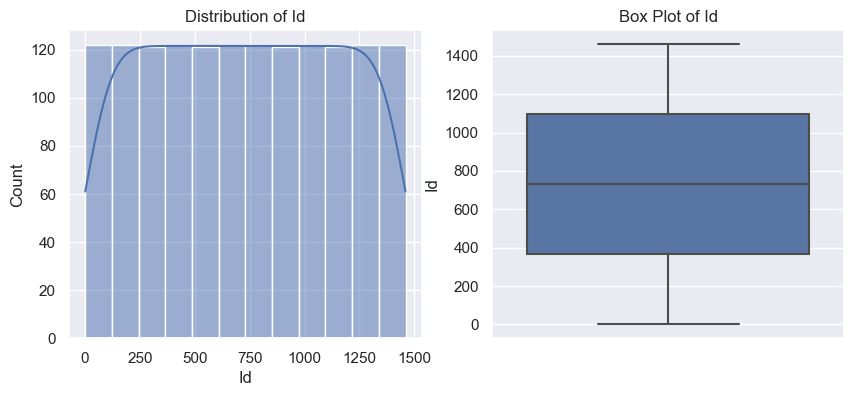

Column: MSSubClass, Missing Data: 0.00%


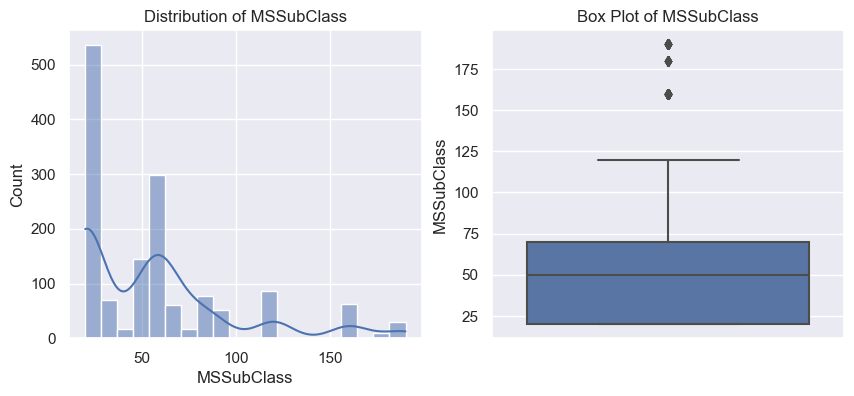

Column: LotFrontage, Missing Data: 0.00%


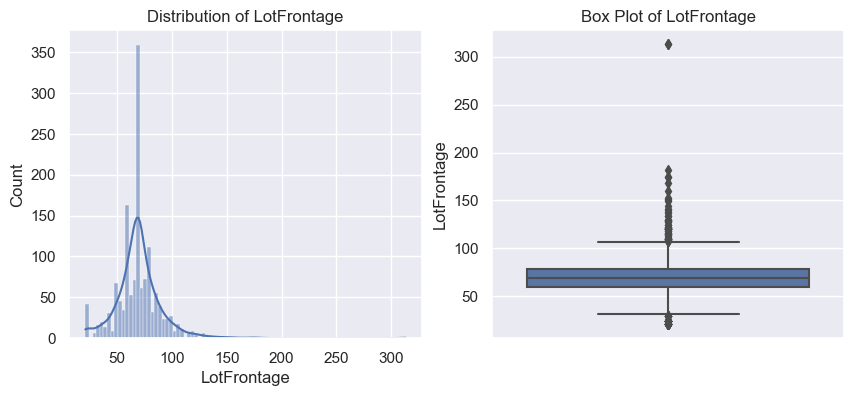

Column: LotArea, Missing Data: 0.00%


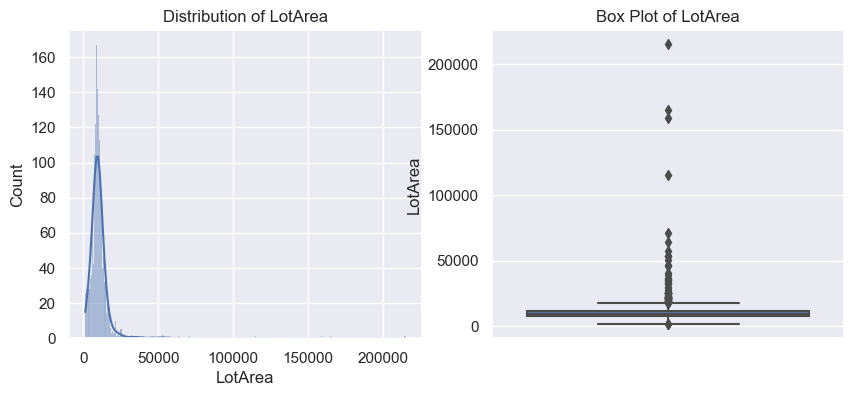

Column: OverallQual, Missing Data: 0.00%


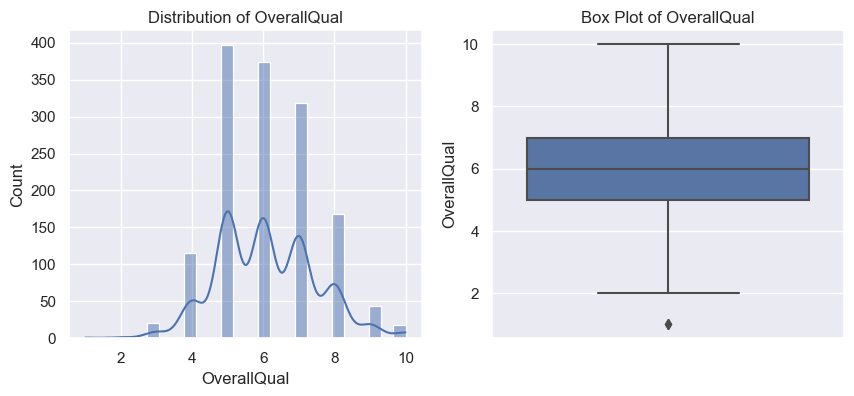

Column: OverallCond, Missing Data: 0.00%


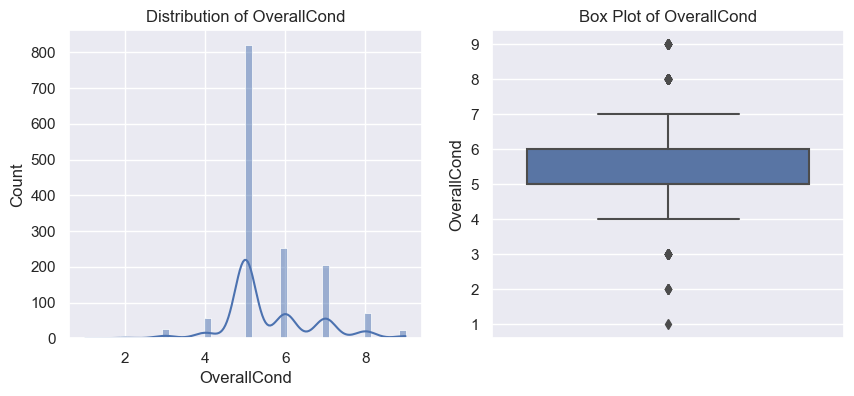

Column: MasVnrArea, Missing Data: 0.00%


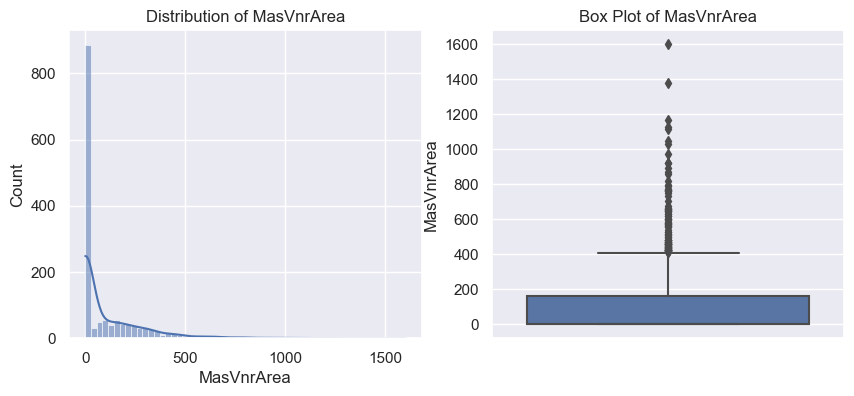

Column: BsmtFinSF1, Missing Data: 0.00%


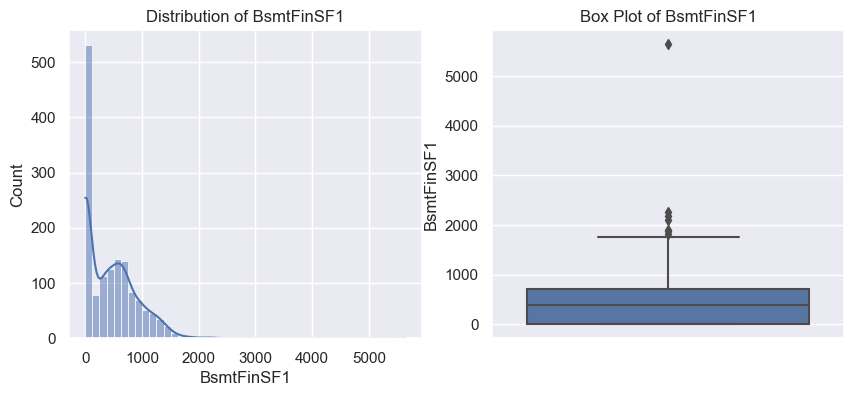

Column: BsmtFinSF2, Missing Data: 0.00%


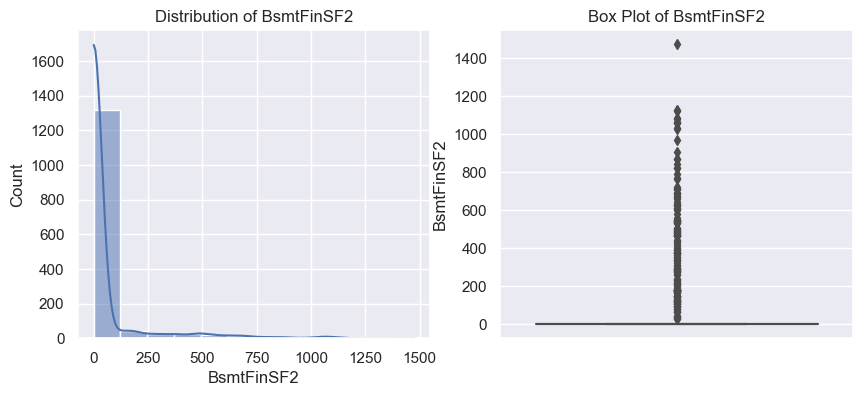

Column: BsmtUnfSF, Missing Data: 0.00%


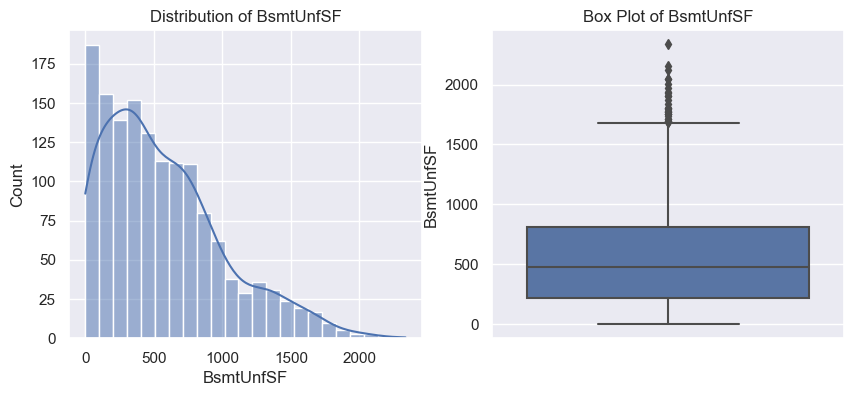

Column: TotalBsmtSF, Missing Data: 0.00%


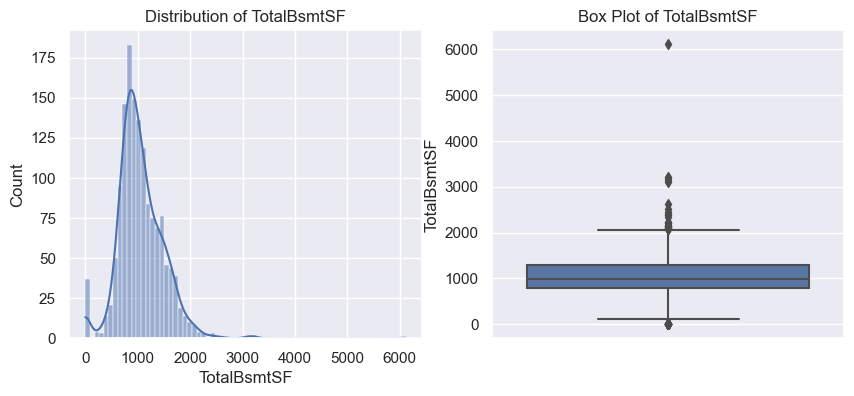

Column: 1stFlrSF, Missing Data: 0.00%


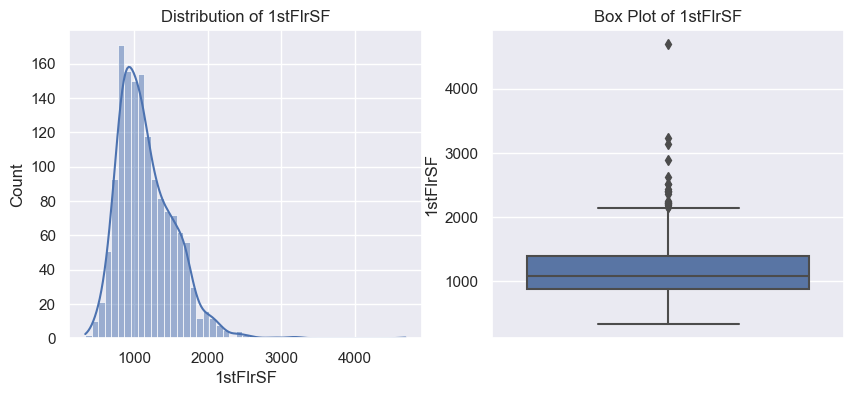

Column: 2ndFlrSF, Missing Data: 0.00%


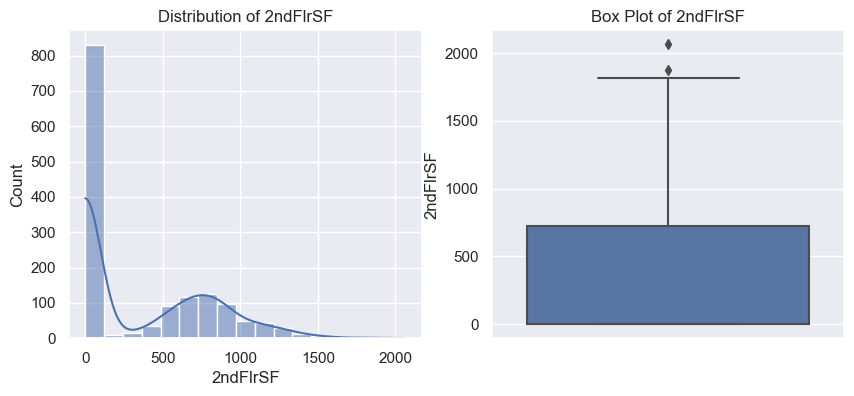

Column: LowQualFinSF, Missing Data: 0.00%


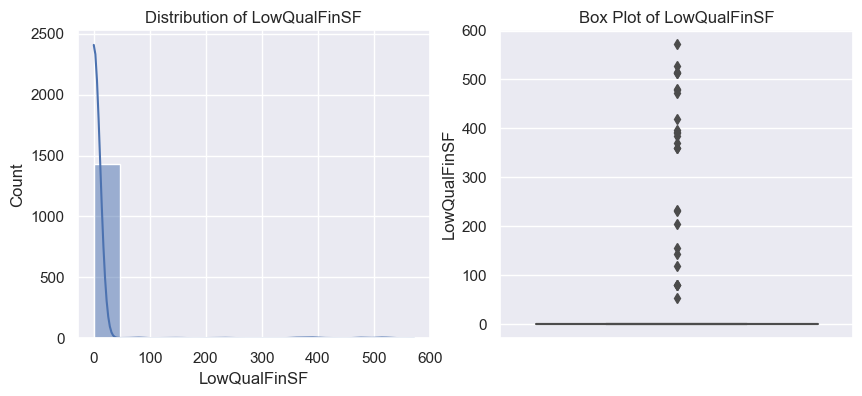

Column: GrLivArea, Missing Data: 0.00%


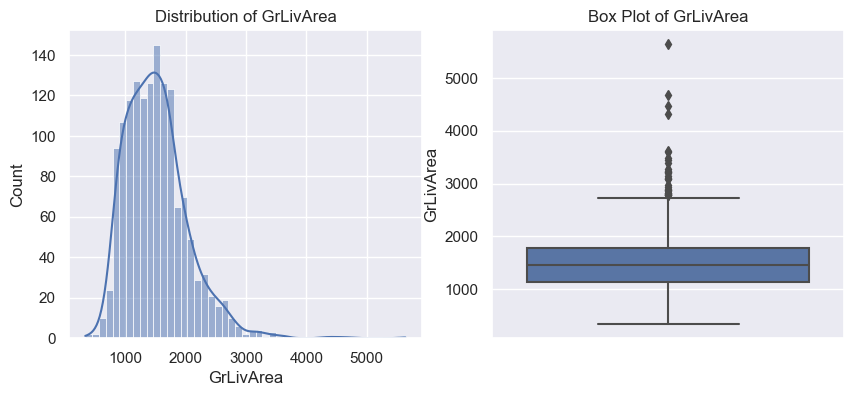

Column: BsmtFullBath, Missing Data: 0.00%


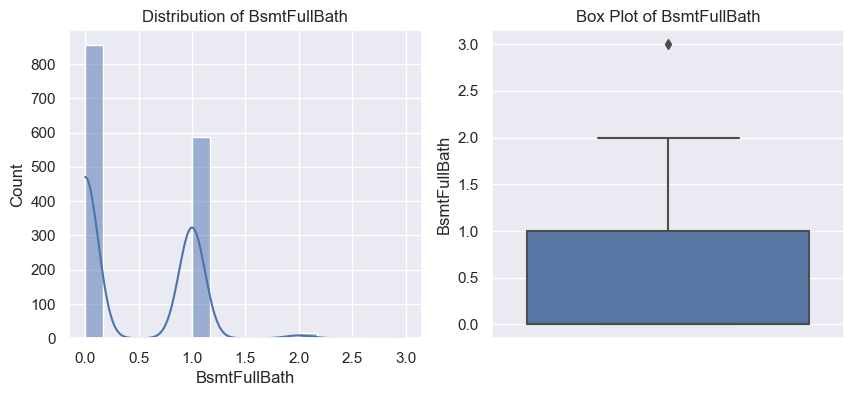

Column: BsmtHalfBath, Missing Data: 0.00%


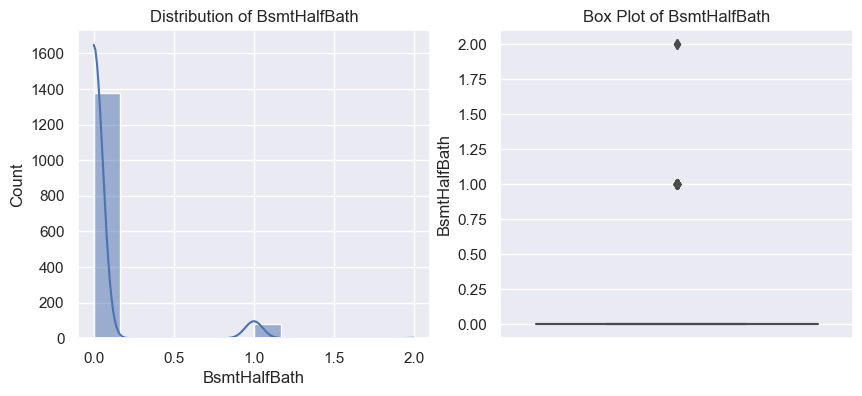

Column: FullBath, Missing Data: 0.00%


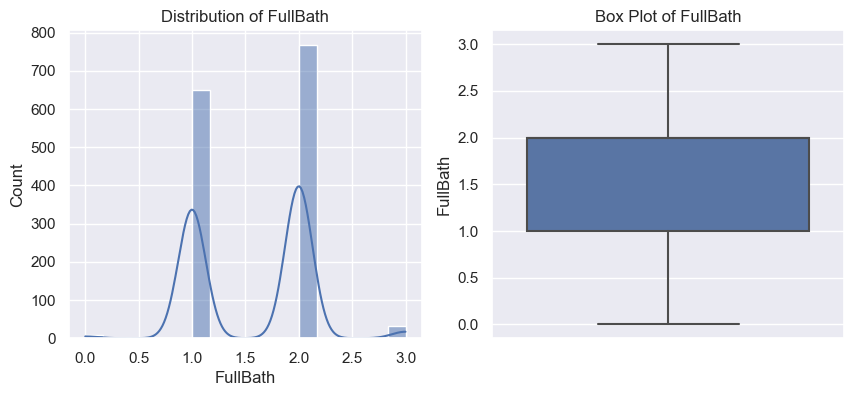

Column: HalfBath, Missing Data: 0.00%


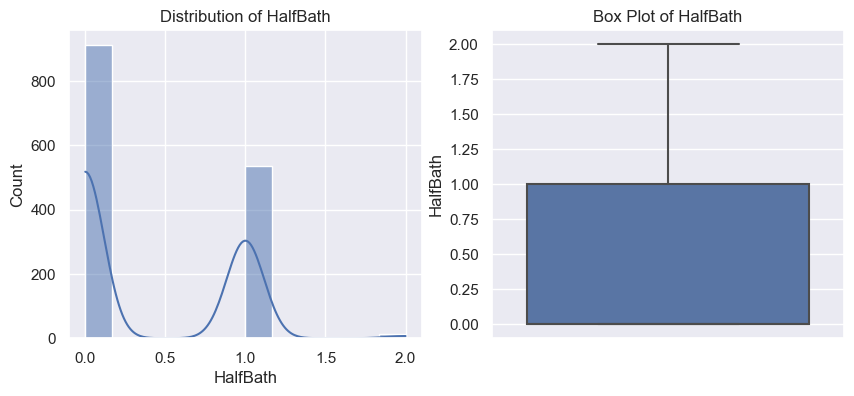

Column: BedroomAbvGr, Missing Data: 0.00%


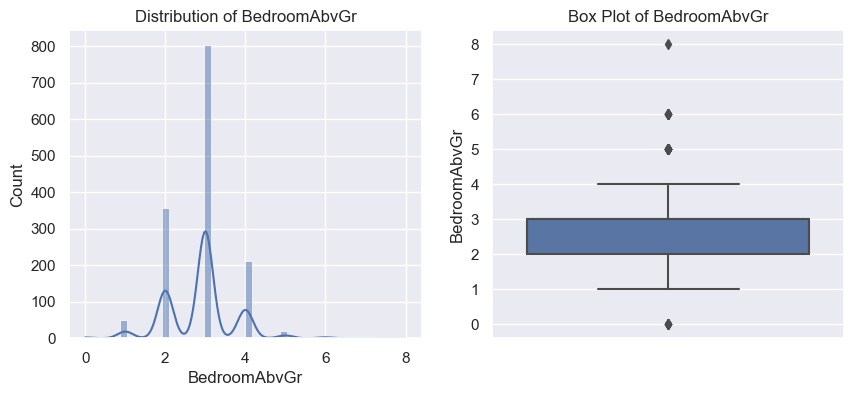

Column: KitchenAbvGr, Missing Data: 0.00%


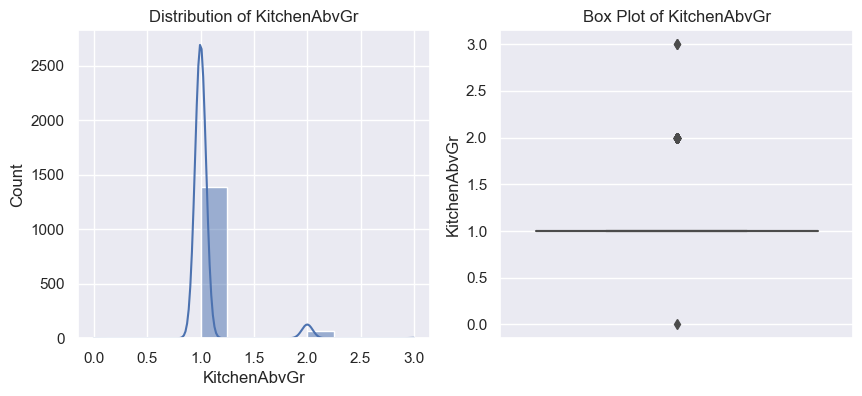

Column: TotRmsAbvGrd, Missing Data: 0.00%


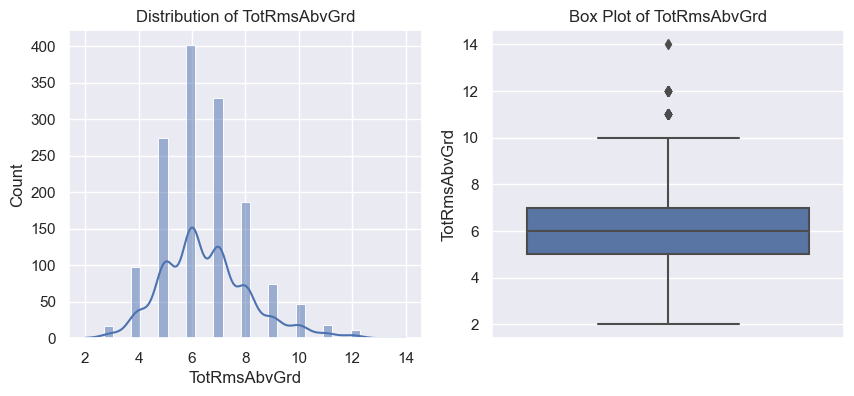

Column: Fireplaces, Missing Data: 0.00%


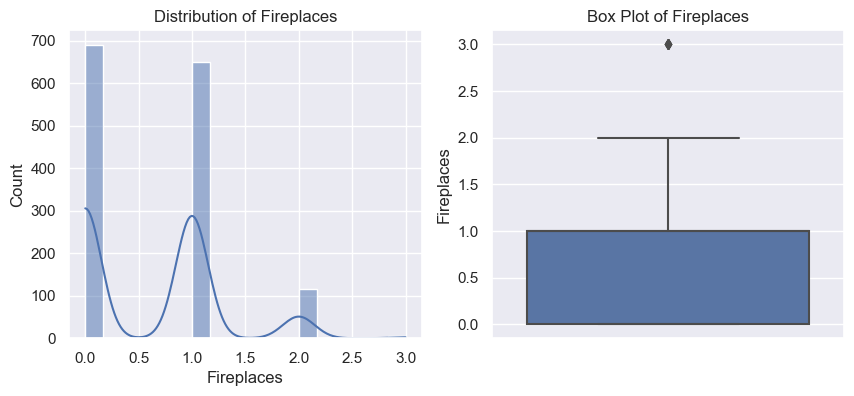

Column: GarageCars, Missing Data: 0.00%


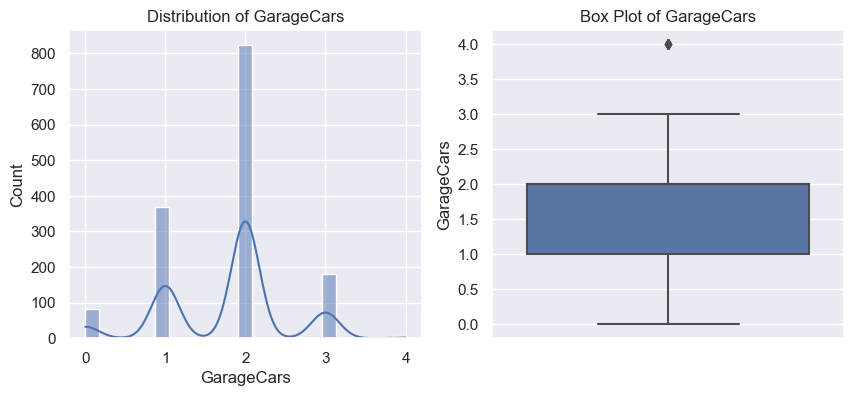

Column: GarageArea, Missing Data: 0.00%


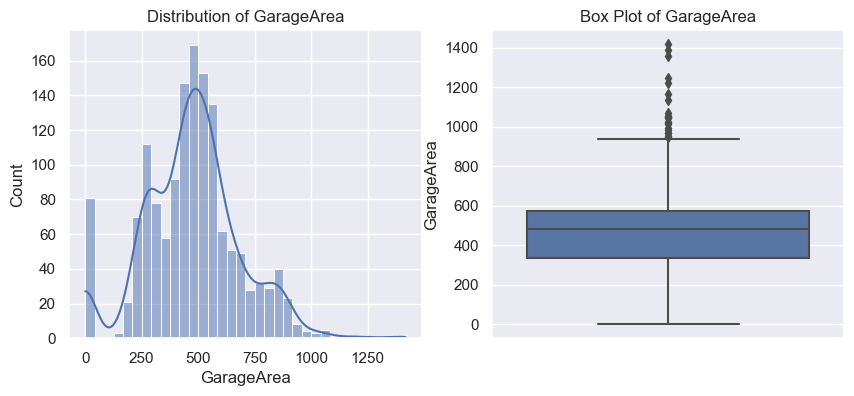

Column: WoodDeckSF, Missing Data: 0.00%


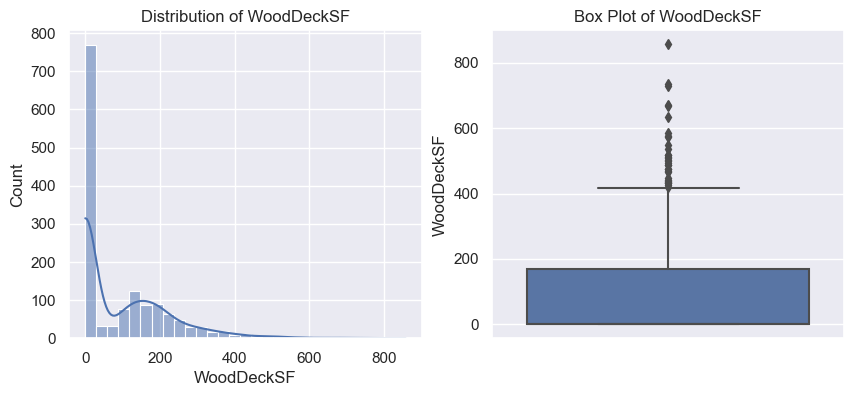

Column: OpenPorchSF, Missing Data: 0.00%


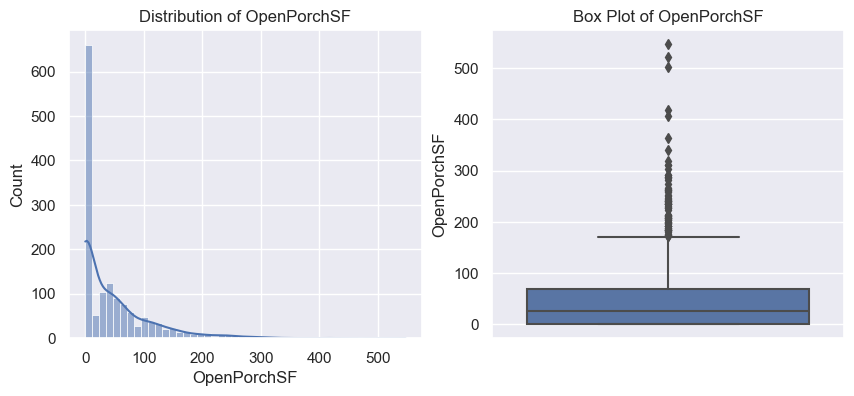

Column: EnclosedPorch, Missing Data: 0.00%


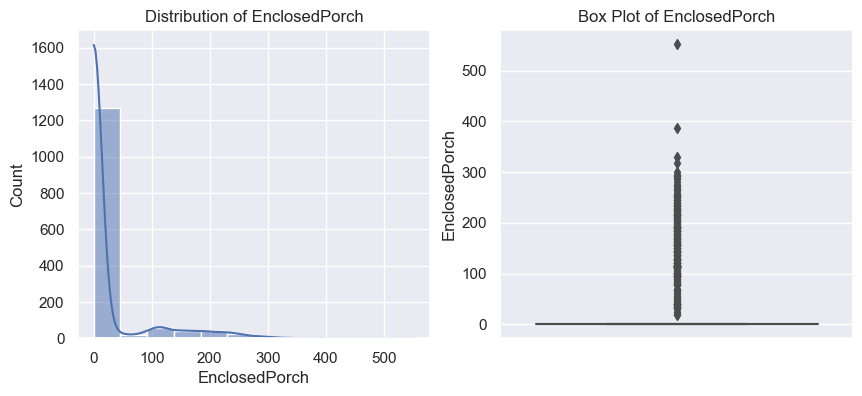

Column: 3SsnPorch, Missing Data: 0.00%


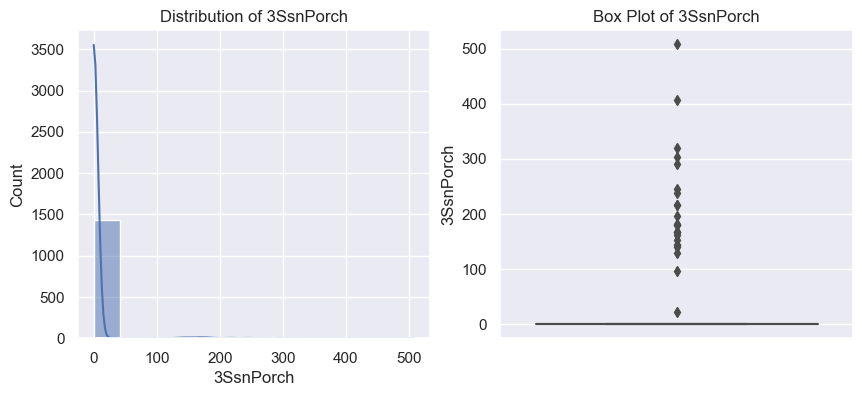

Column: ScreenPorch, Missing Data: 0.00%


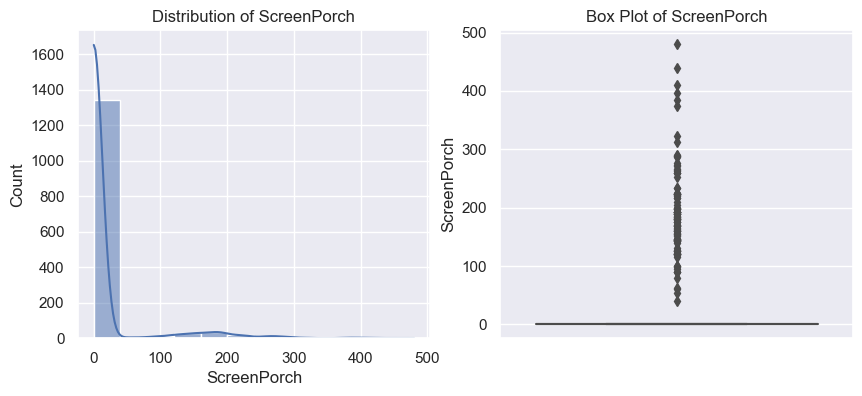

Column: SalePrice, Missing Data: 0.00%


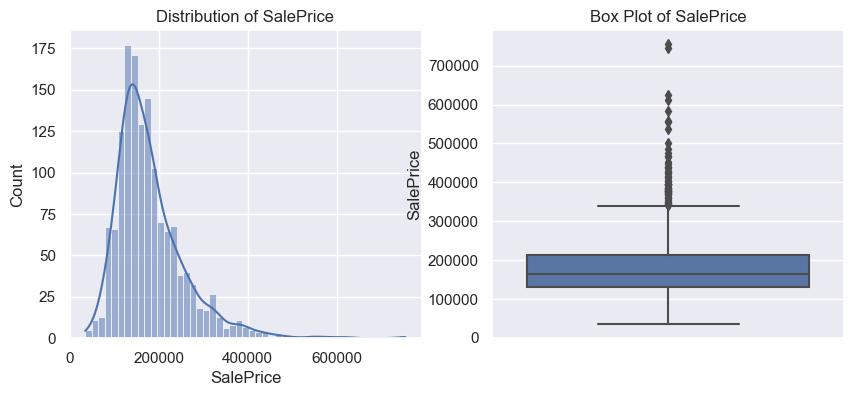

Column: Propertyageatsale, Missing Data: 0.00%


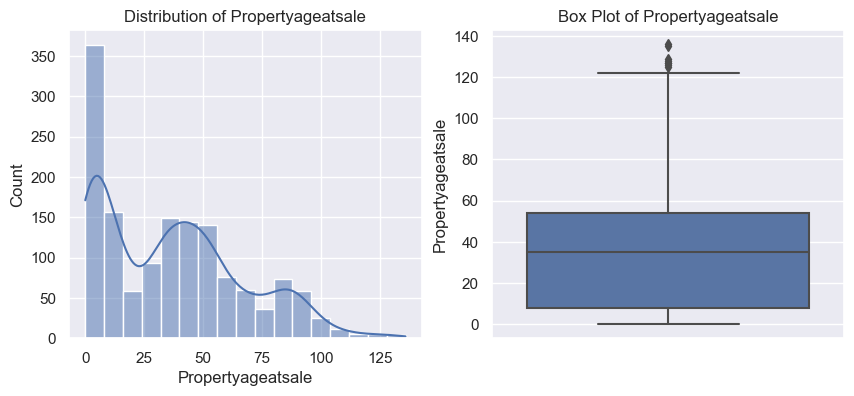

Column: Garageageatsale, Missing Data: 0.00%


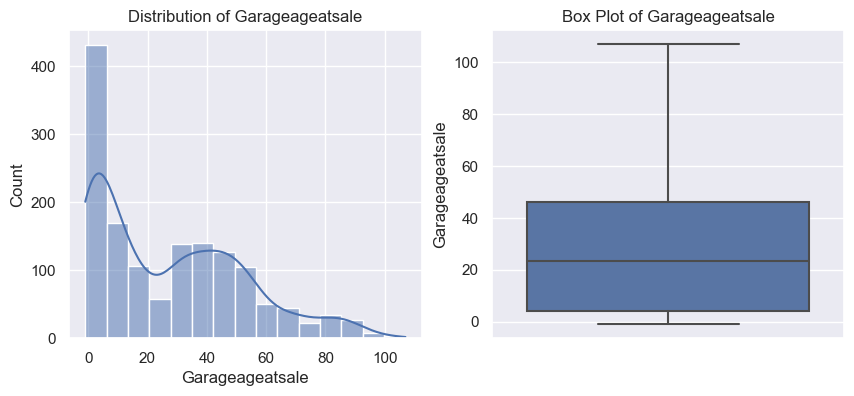

Column: MSZoning, Missing Data: 0.00%


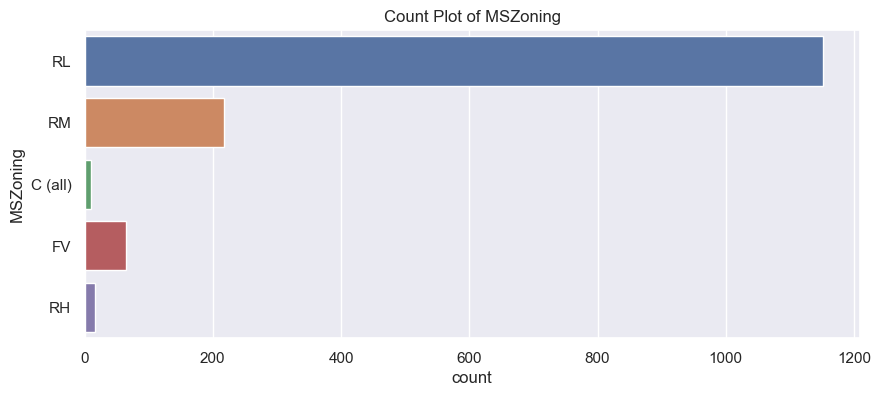

Column: Street, Missing Data: 0.00%


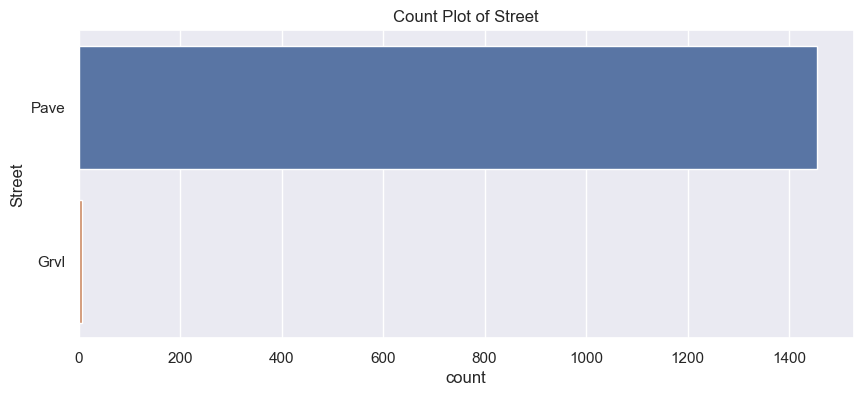

Column: LotShape, Missing Data: 0.00%


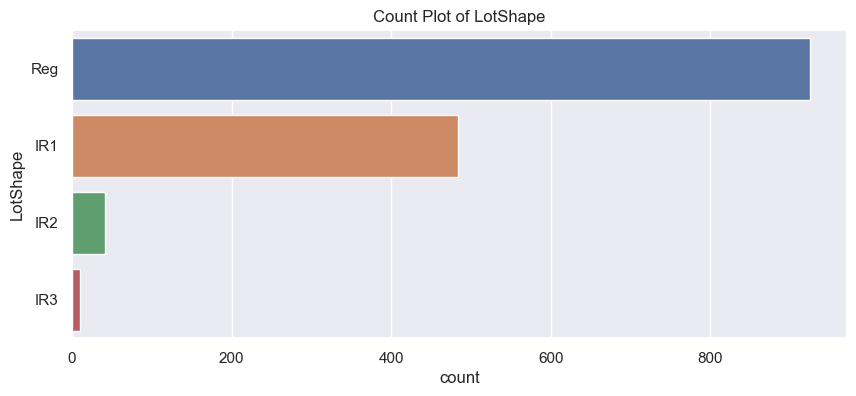

Column: LandContour, Missing Data: 0.00%


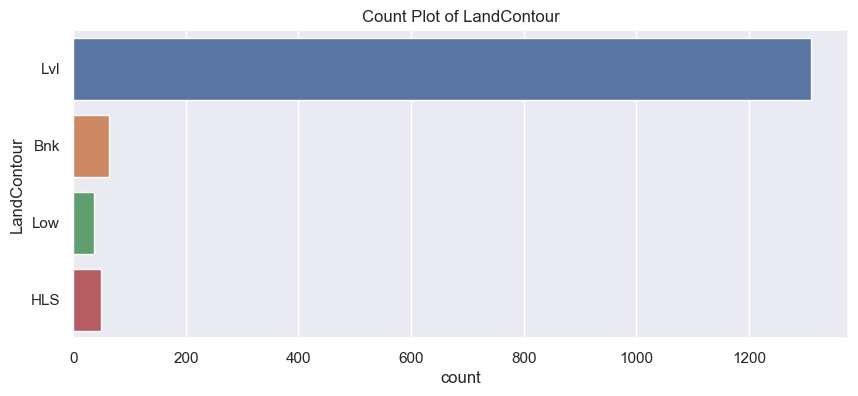

Column: Utilities, Missing Data: 0.00%


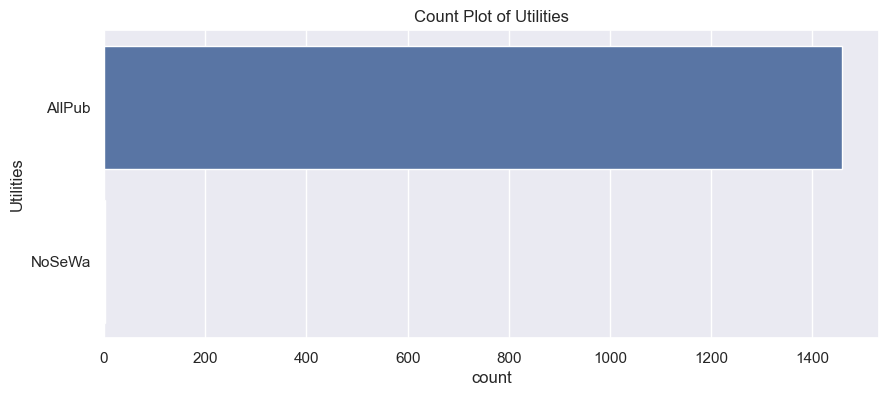

Column: LotConfig, Missing Data: 0.00%


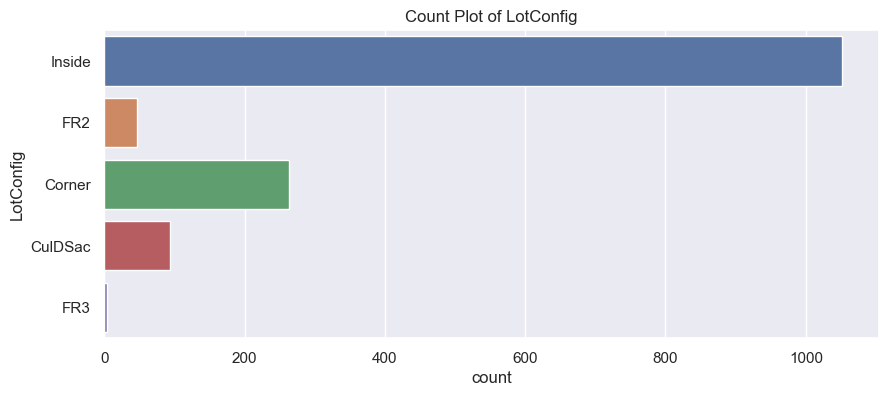

Column: LandSlope, Missing Data: 0.00%


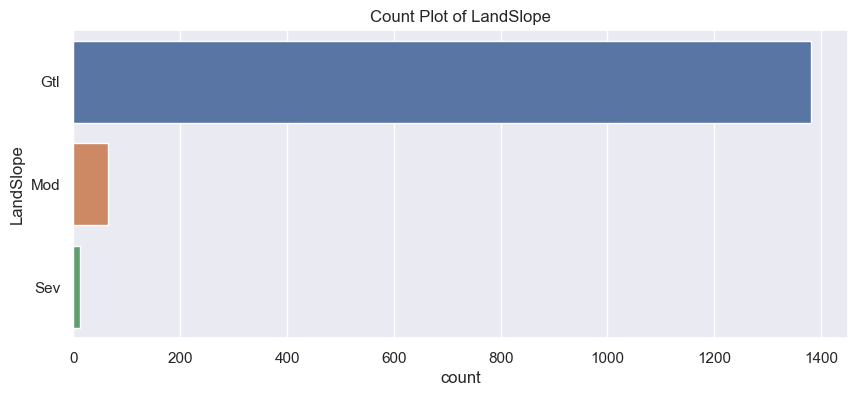

Column: Neighborhood, Missing Data: 0.00%


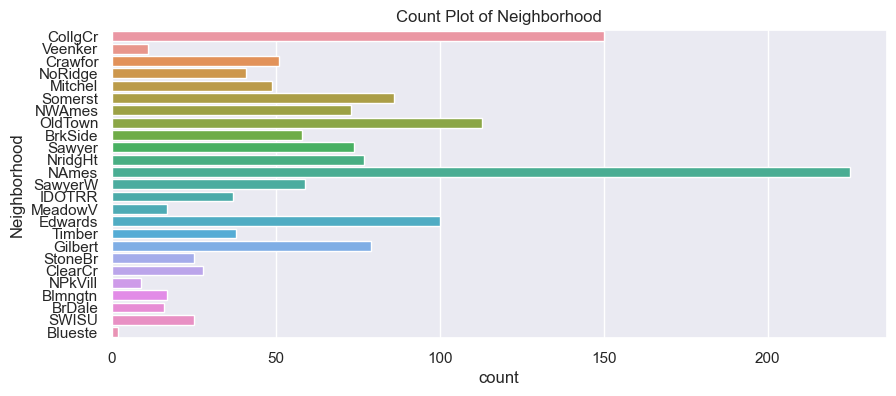

Column: Condition1, Missing Data: 0.00%


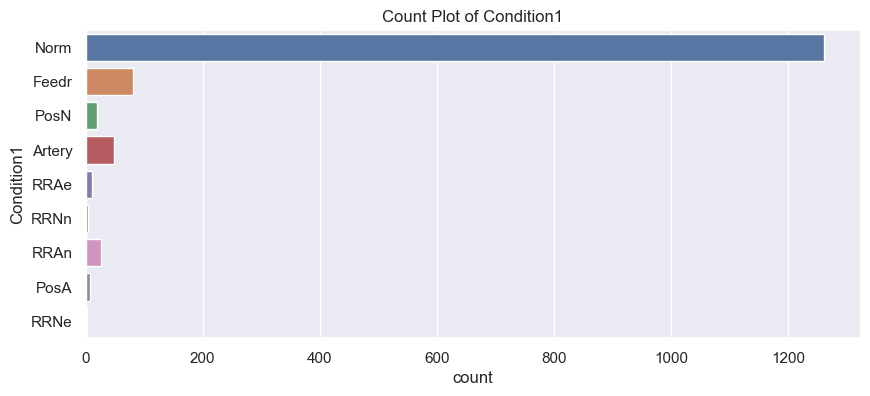

Column: Condition2, Missing Data: 0.00%


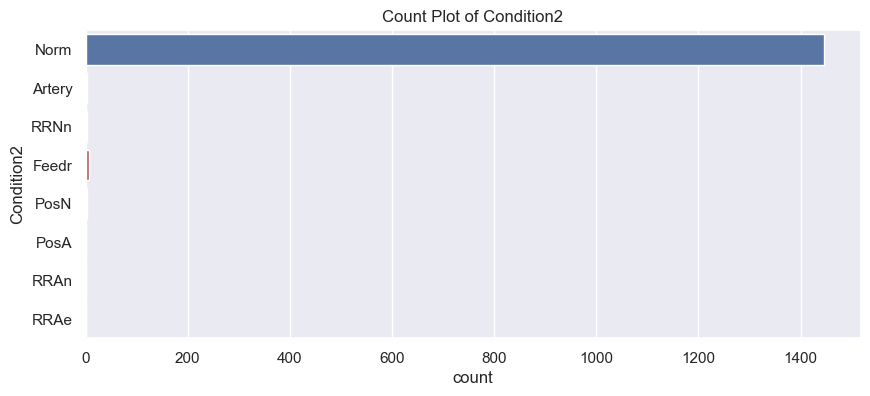

Column: BldgType, Missing Data: 0.00%


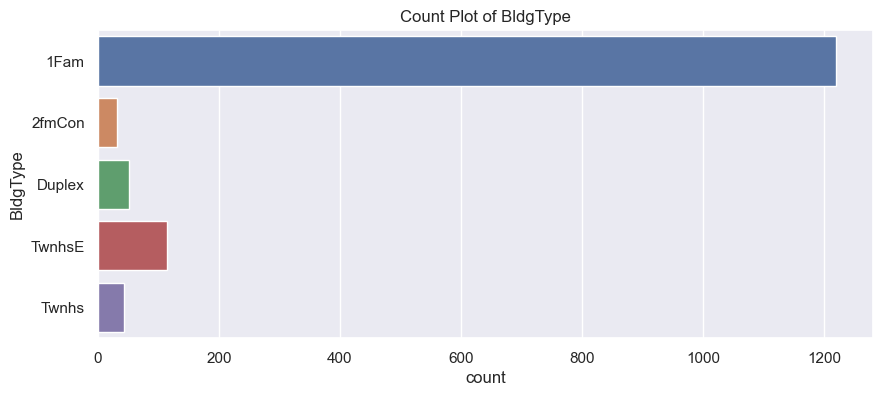

Column: HouseStyle, Missing Data: 0.00%


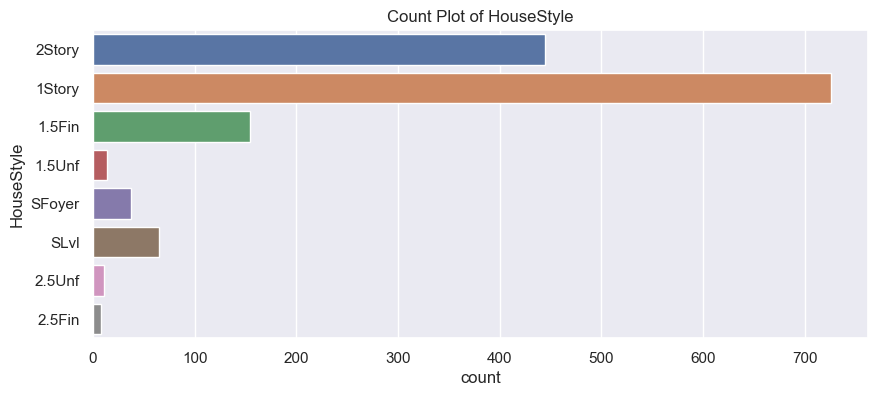

Column: RoofStyle, Missing Data: 0.00%


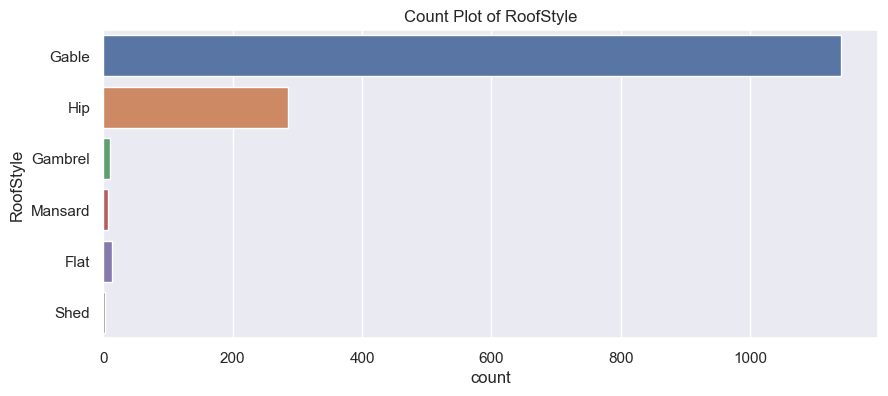

Column: RoofMatl, Missing Data: 0.00%


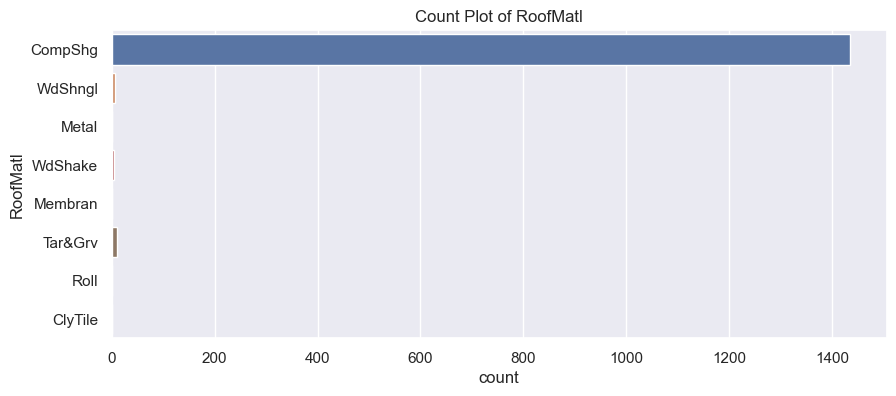

Column: Exterior1st, Missing Data: 0.00%


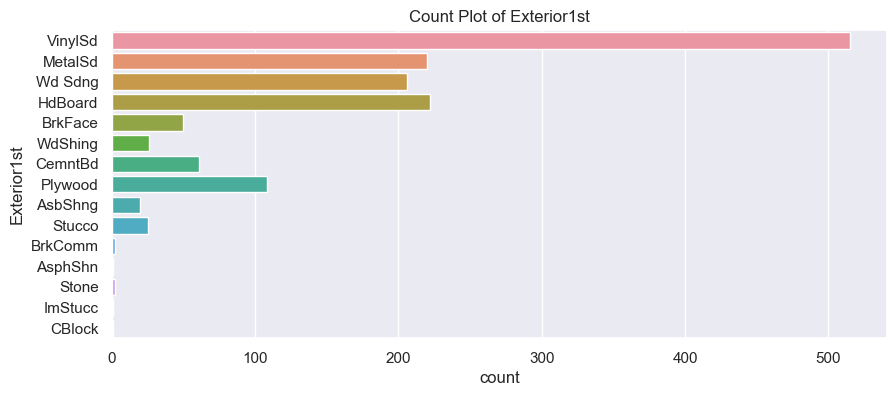

Column: Exterior2nd, Missing Data: 0.00%


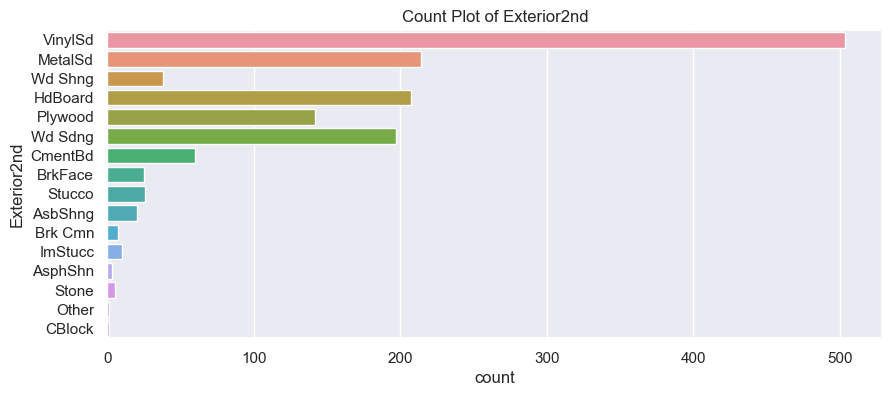

Column: MasVnrType, Missing Data: 0.00%


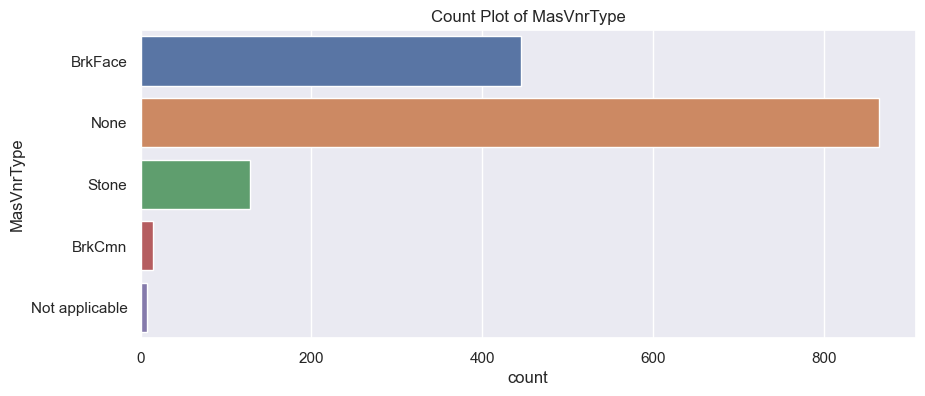

Column: ExterQual, Missing Data: 0.00%


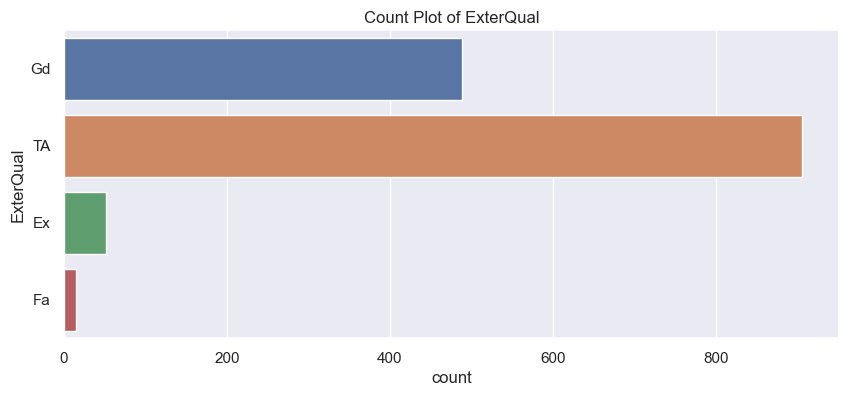

Column: ExterCond, Missing Data: 0.00%


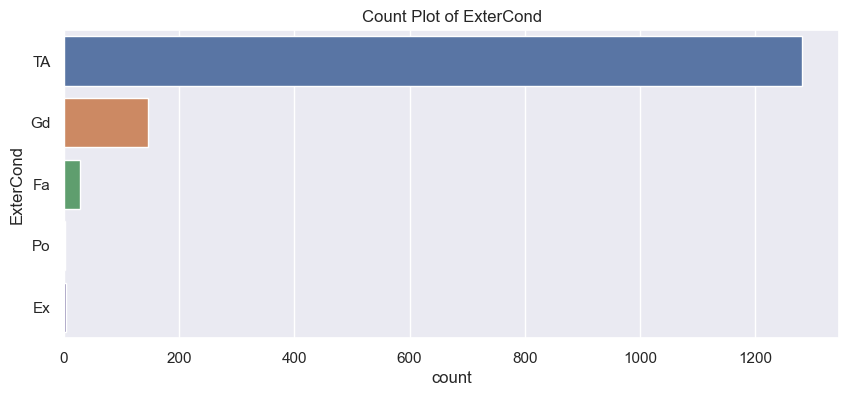

Column: Foundation, Missing Data: 0.00%


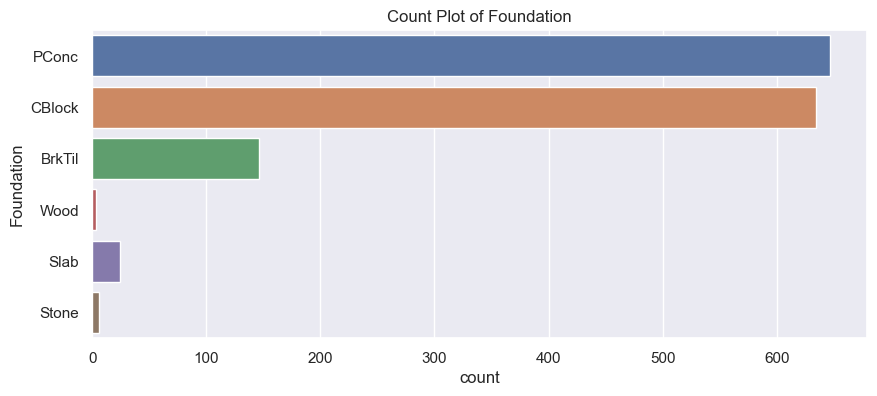

Column: BsmtQual, Missing Data: 0.00%


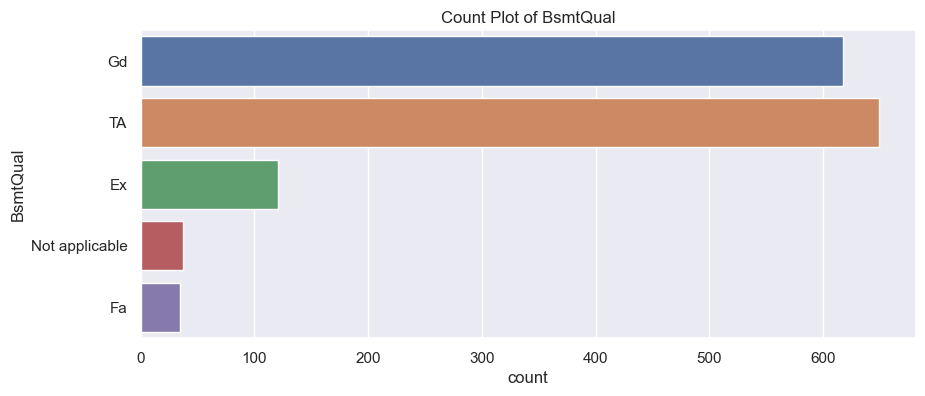

Column: BsmtCond, Missing Data: 0.00%


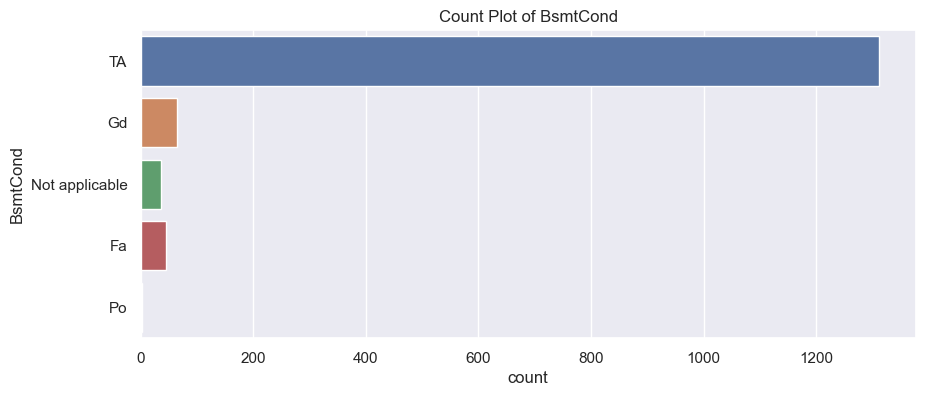

Column: BsmtExposure, Missing Data: 0.00%


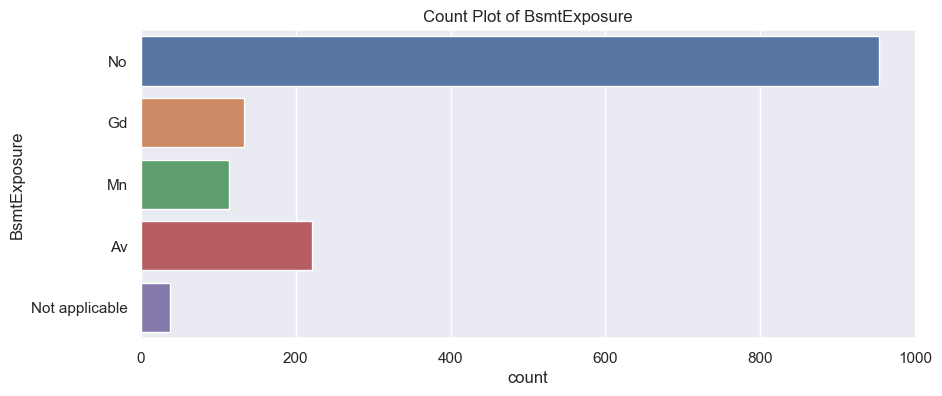

Column: BsmtFinType1, Missing Data: 0.00%


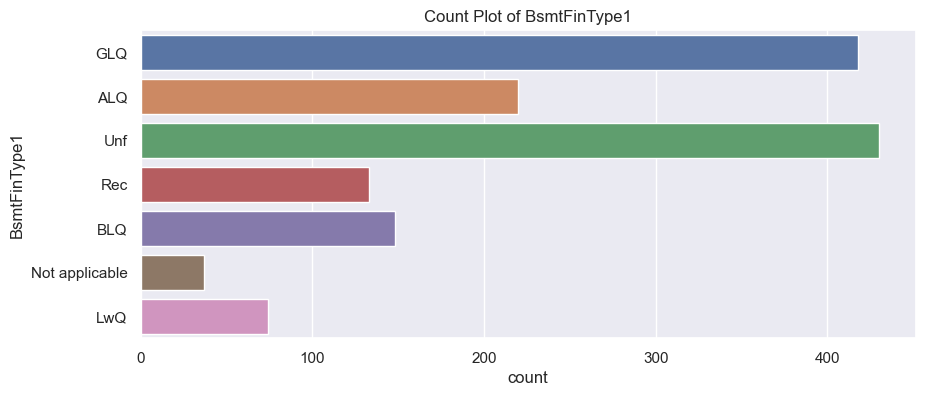

Column: BsmtFinType2, Missing Data: 0.00%


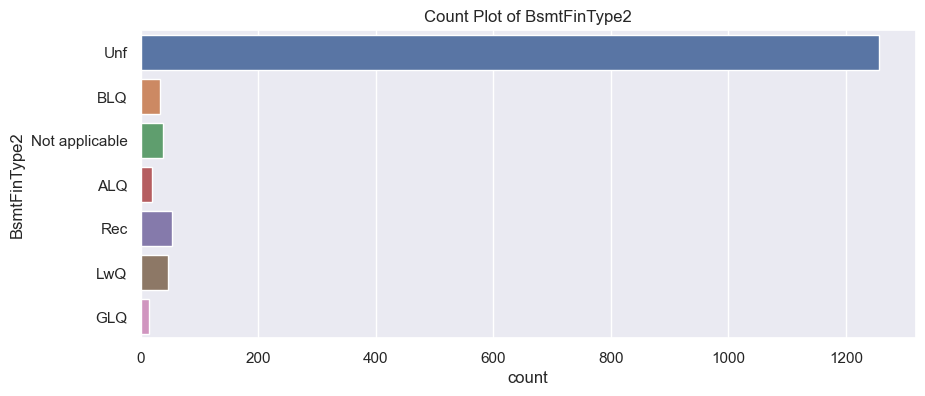

Column: Heating, Missing Data: 0.00%


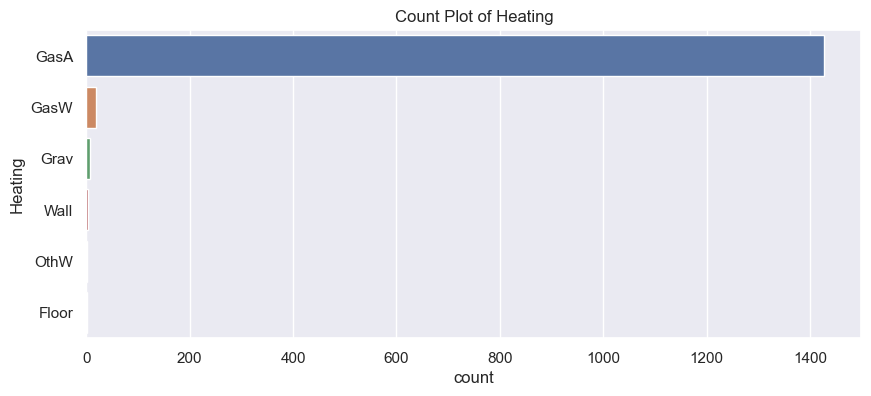

Column: HeatingQC, Missing Data: 0.00%


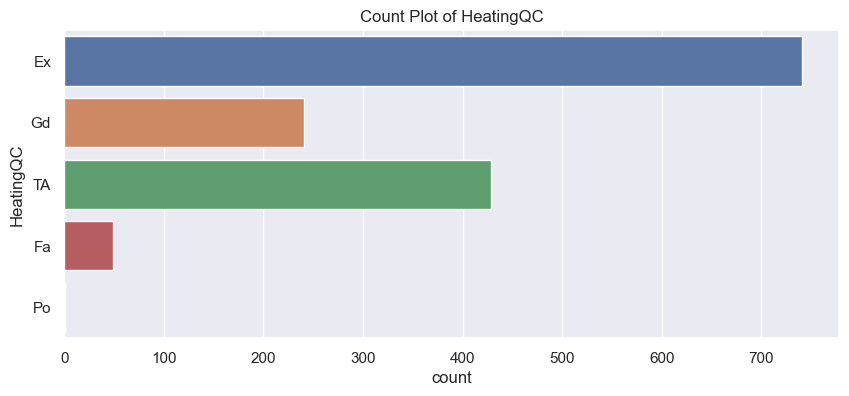

Column: CentralAir, Missing Data: 0.00%


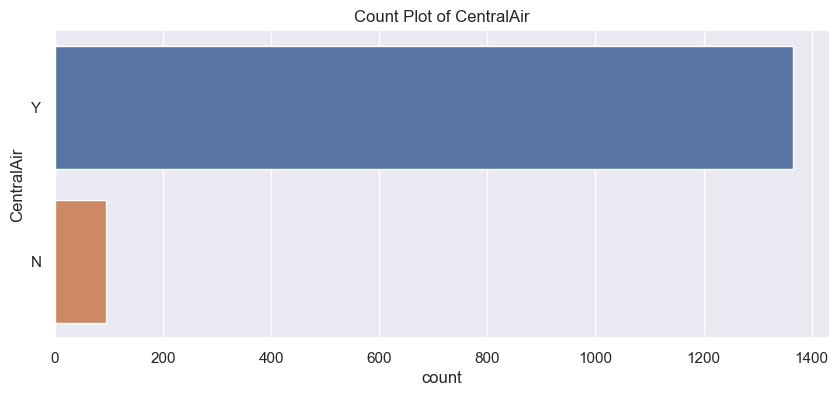

Column: Electrical, Missing Data: 0.00%


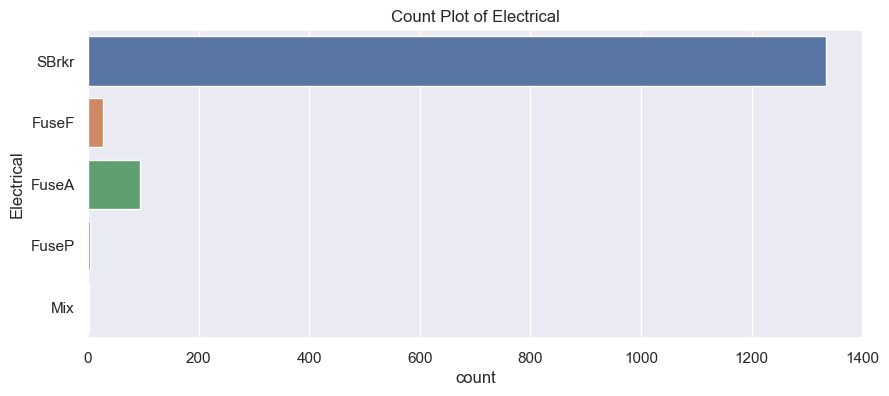

Column: KitchenQual, Missing Data: 0.00%


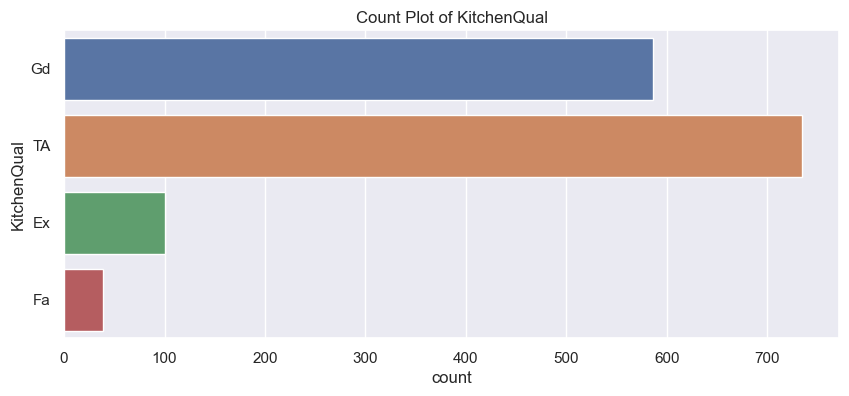

Column: Functional, Missing Data: 0.00%


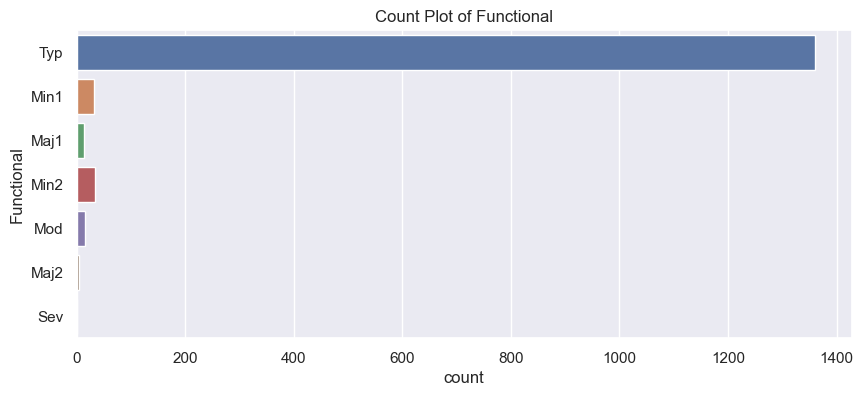

Column: FireplaceQu, Missing Data: 0.00%


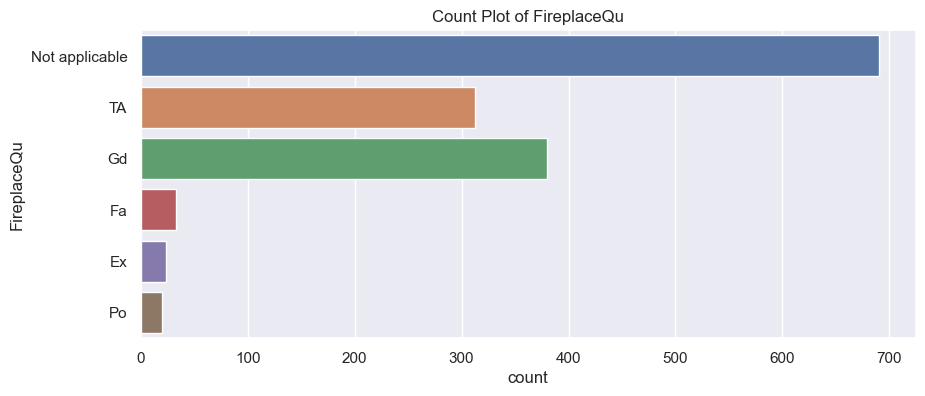

Column: GarageType, Missing Data: 0.00%


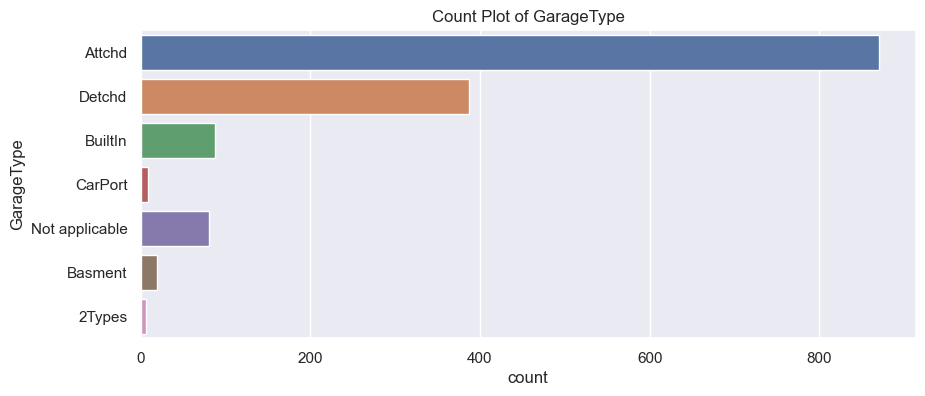

Column: GarageFinish, Missing Data: 0.00%


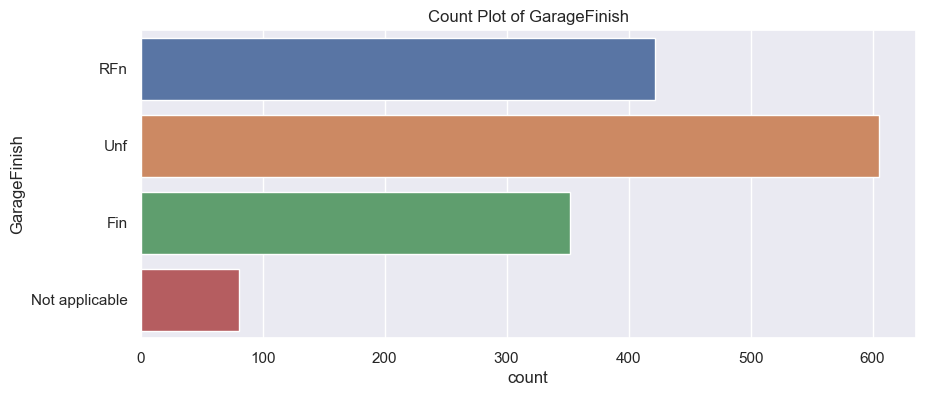

Column: GarageQual, Missing Data: 0.00%


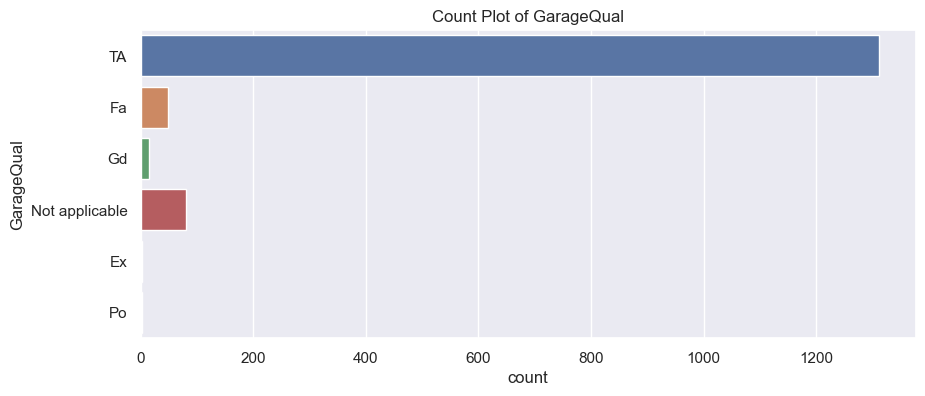

Column: GarageCond, Missing Data: 0.00%


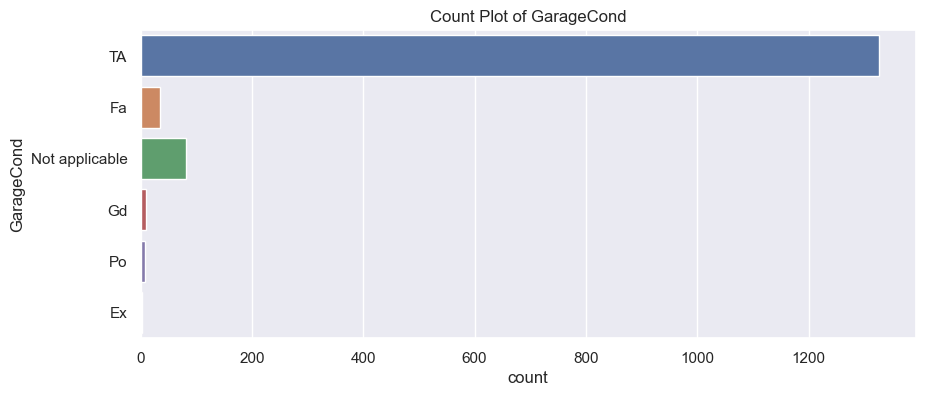

Column: PavedDrive, Missing Data: 0.00%


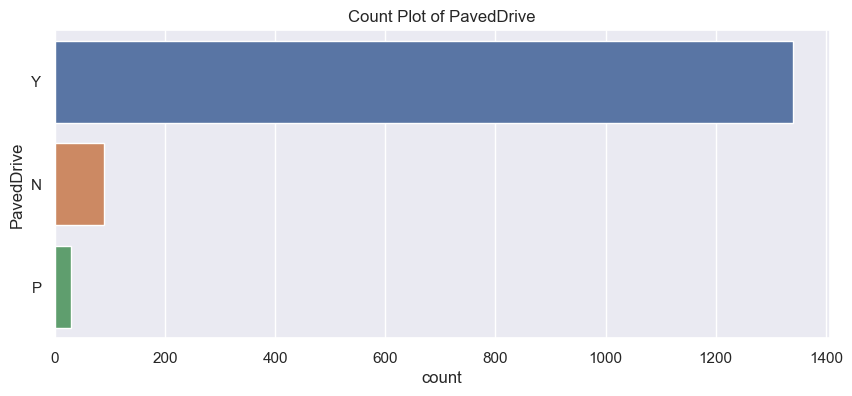

Column: Fence, Missing Data: 0.00%


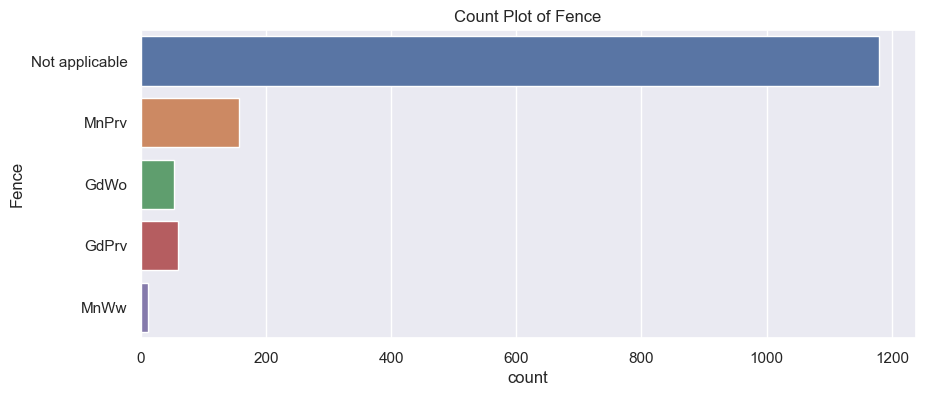

Column: SaleType, Missing Data: 0.00%


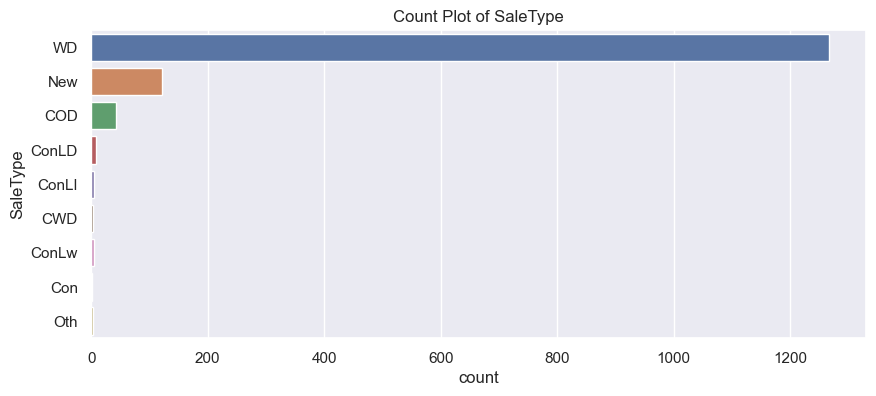

Column: SaleCondition, Missing Data: 0.00%


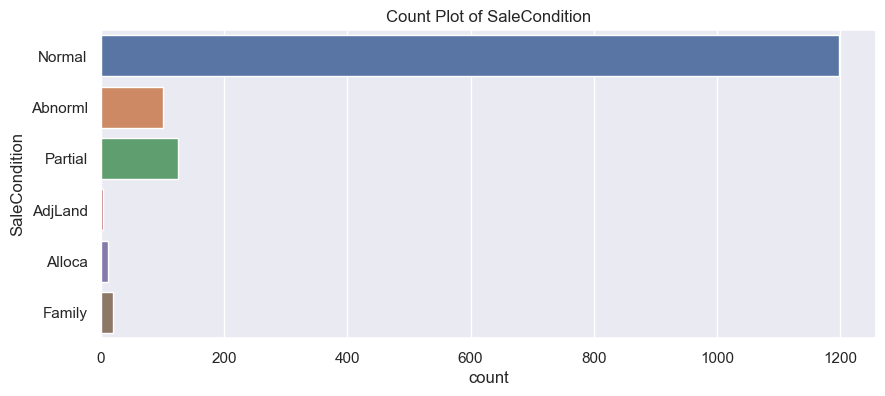

In [210]:
# Define a function for univariate analysis to draw the following only;

# distribution and box plot for numerical columns and;
# count plot for categorical columns

def univariate_analysis(df, column_list, plot_type='numerical'):
    for column in column_list:
        if column not in df.columns:
            print(f"Column {column} not found in dataframe.")
            continue

        missing_percentage = df[column].isna().sum() / len(df) * 100
        print(f"Column: {column}, Missing Data: {missing_percentage:.2f}%")

        if missing_percentage < 30:
            plt.figure(figsize=(10, 4))

            if plot_type == 'numerical':
                # Distribution plot for numerical data
                plt.subplot(1, 2, 1)
                sns.histplot(df[column].dropna(), kde=True)
                plt.title(f'Distribution of {column}')

                plt.subplot(1, 2, 2)
                sns.boxplot(y=df[column].dropna())
                plt.title(f'Box Plot of {column}')
            elif plot_type == 'categorical':
                # Count plot for categorical data
                sns.countplot(y=df[column].dropna())
                plt.title(f'Count Plot of {column}')
            
            plt.show()
        else:
            print(f"Skipping {column} due to high percentage of missing data.")

univariate_analysis(houseprice_df, numeric_cols, plot_type='numerical')
univariate_analysis(houseprice_df, categorical_cols, plot_type='categorical')

MSZoning


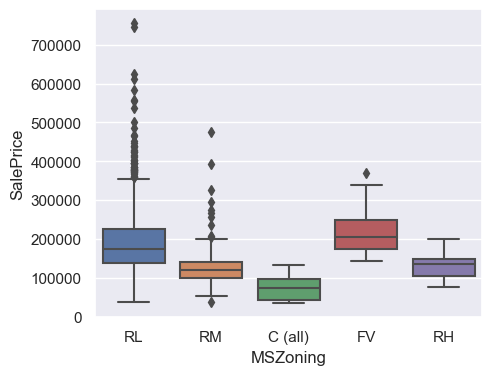

Street


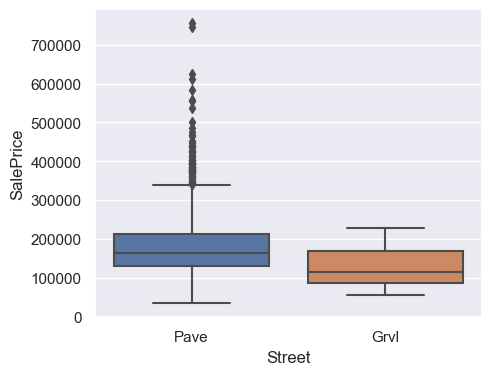

LotShape


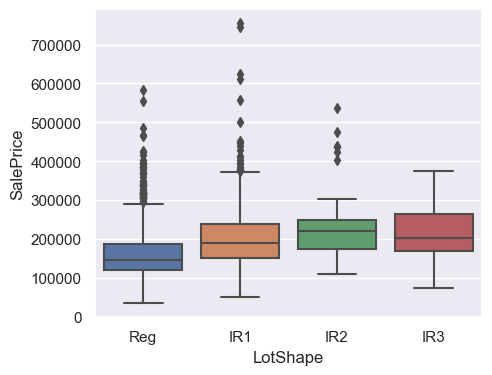

LandContour


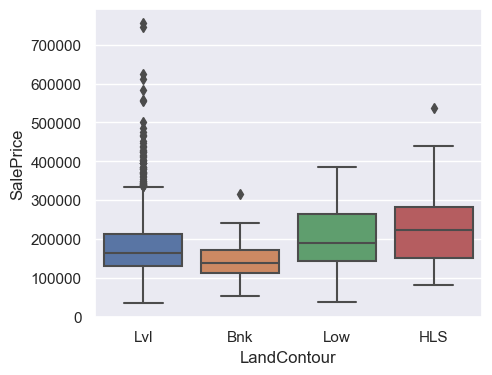

Utilities


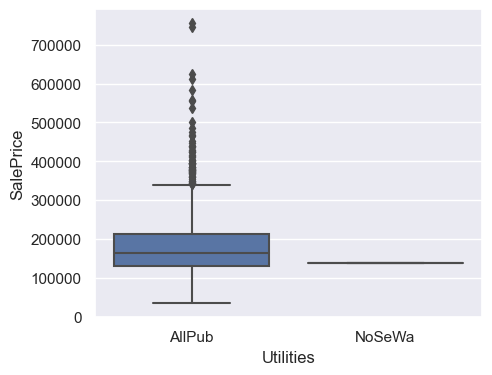

LotConfig


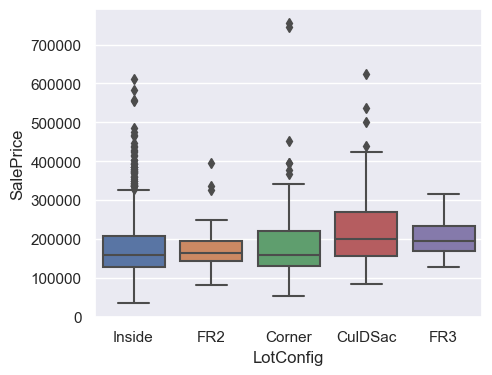

LandSlope


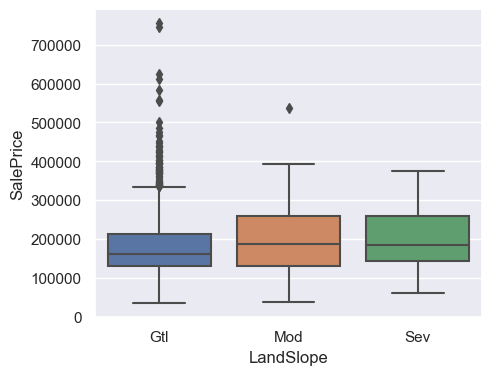

Neighborhood


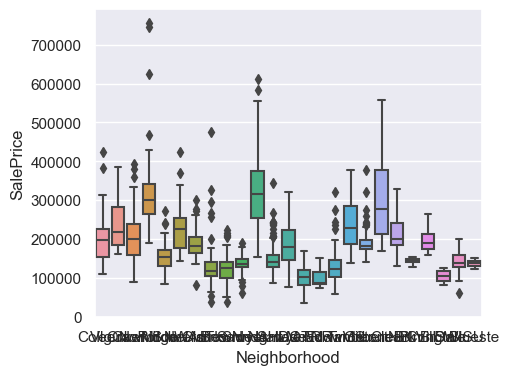

Condition1


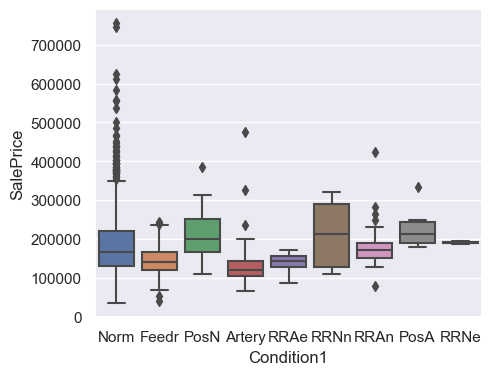

Condition2


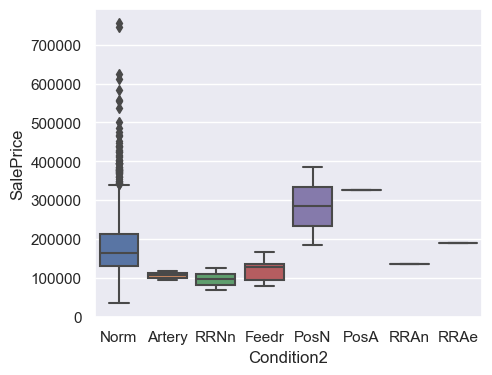

BldgType


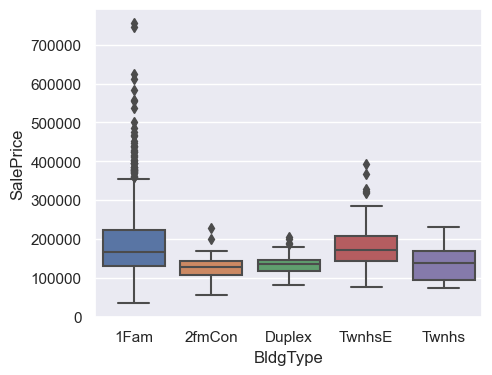

HouseStyle


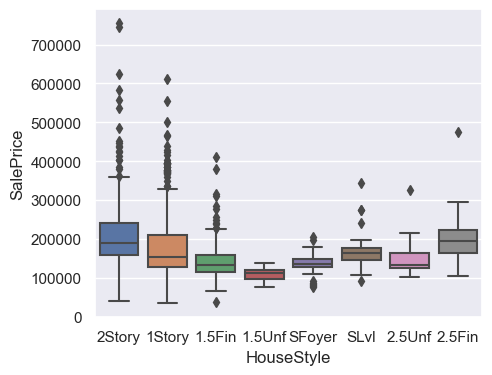

RoofStyle


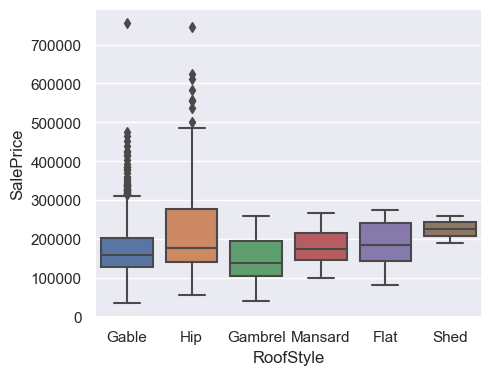

RoofMatl


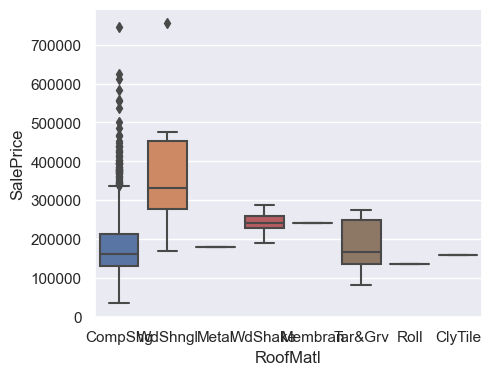

Exterior1st


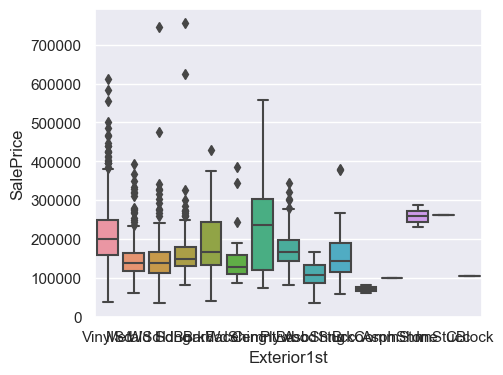

Exterior2nd


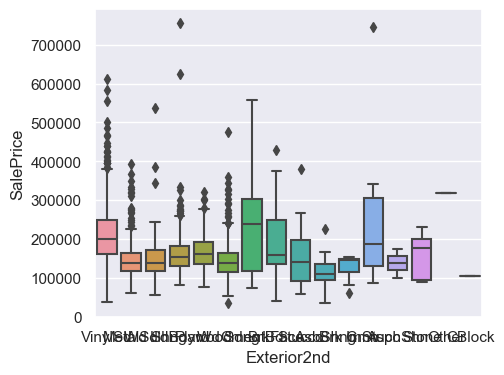

MasVnrType


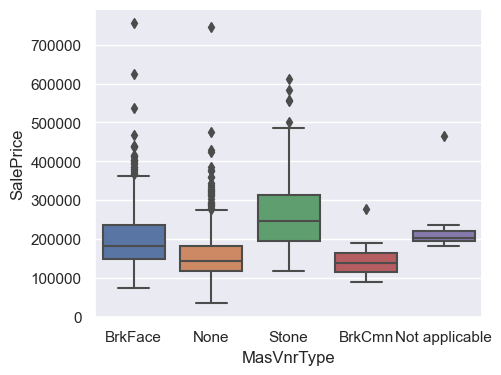

ExterQual


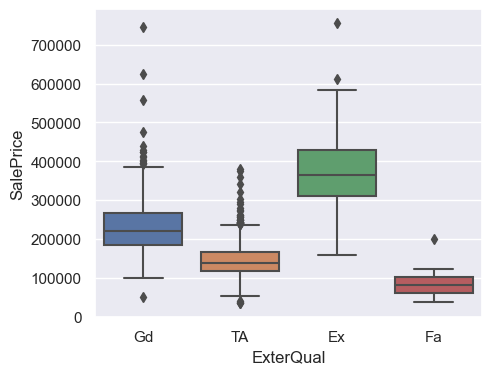

ExterCond


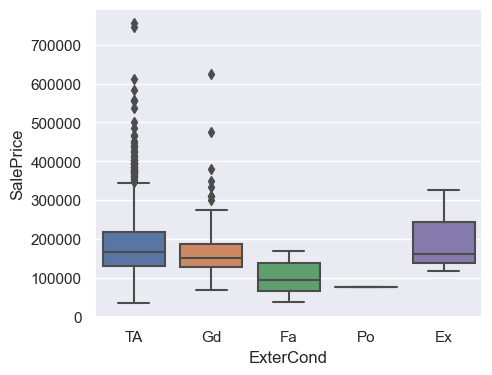

Foundation


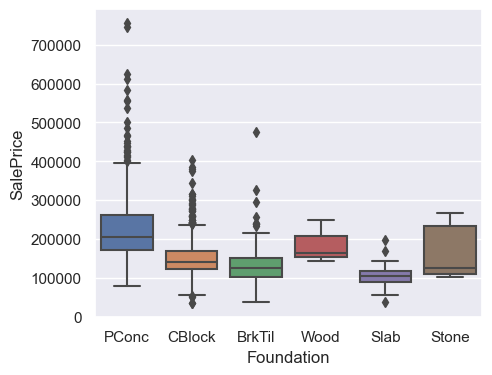

BsmtQual


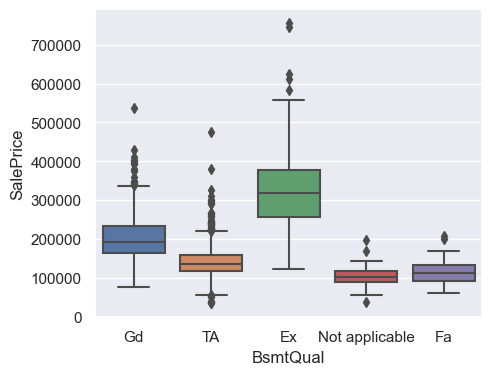

BsmtCond


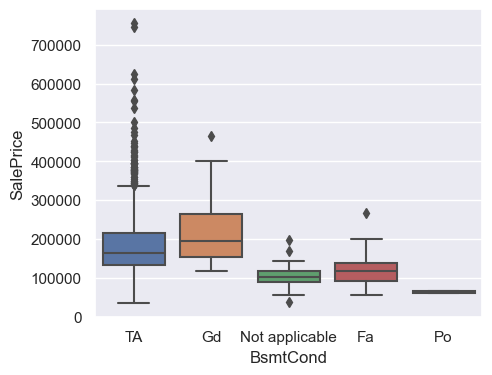

BsmtExposure


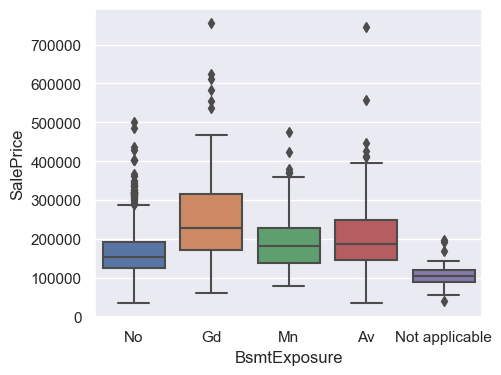

BsmtFinType1


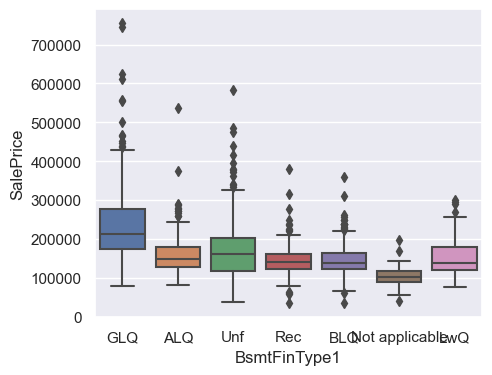

BsmtFinType2


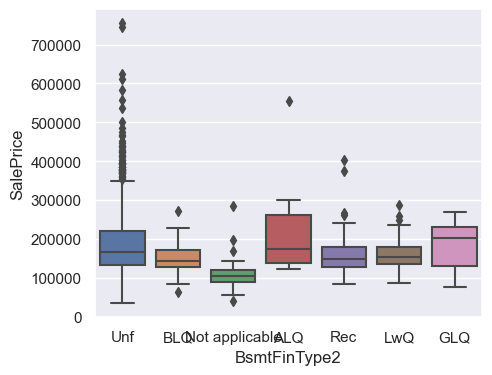

Heating


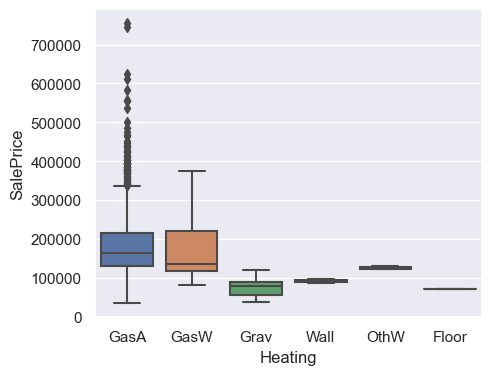

HeatingQC


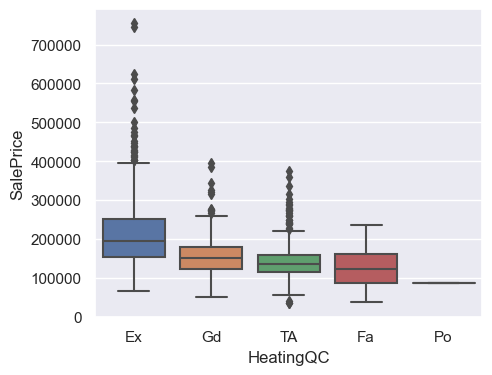

CentralAir


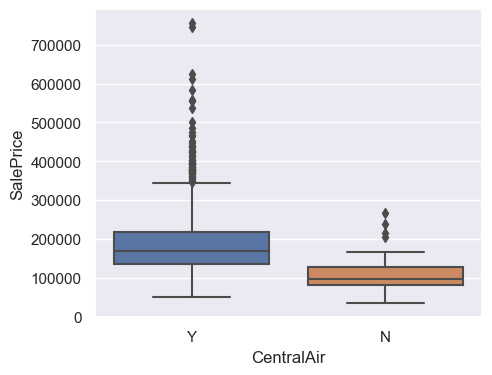

Electrical


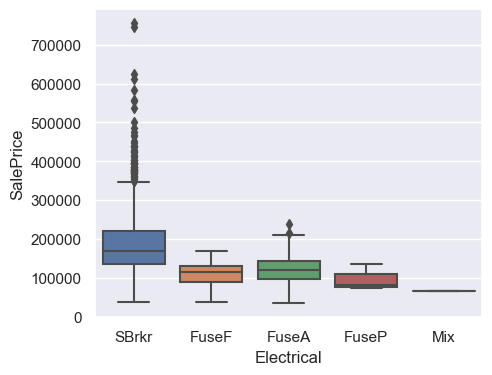

KitchenQual


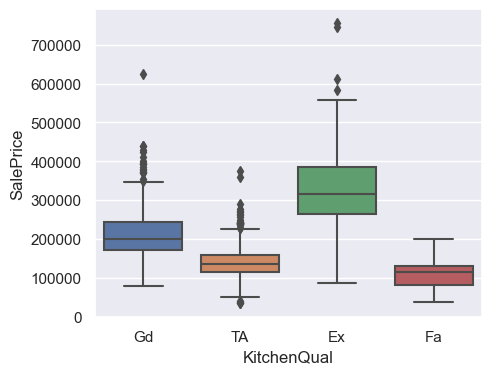

Functional


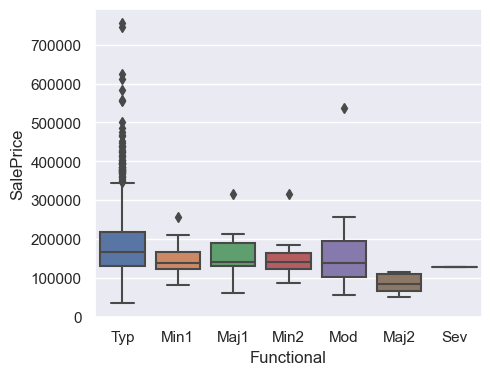

FireplaceQu


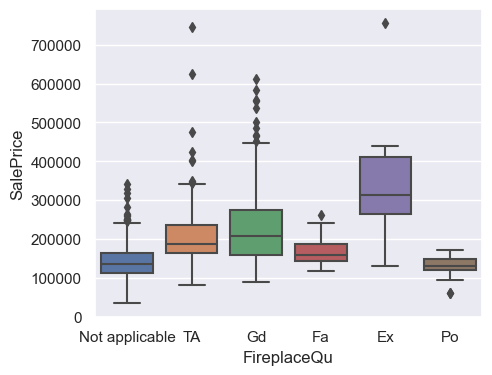

GarageType


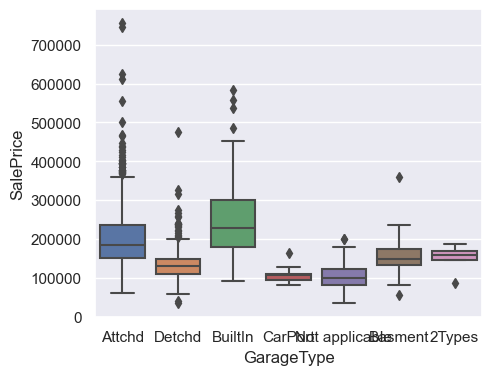

GarageFinish


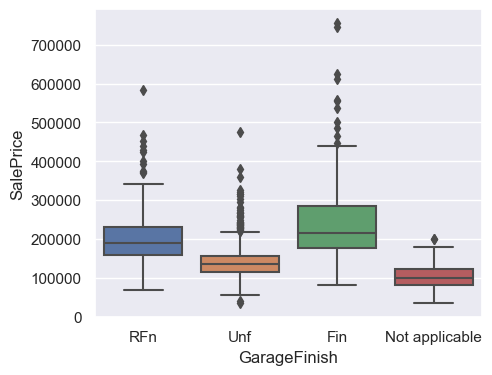

GarageQual


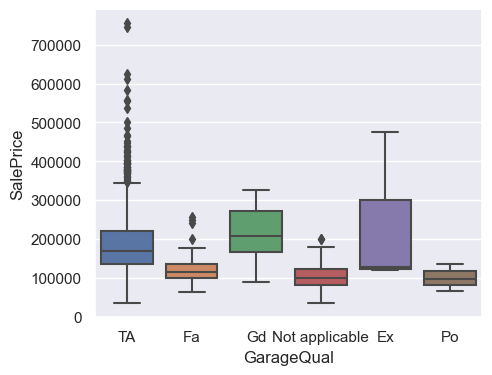

GarageCond


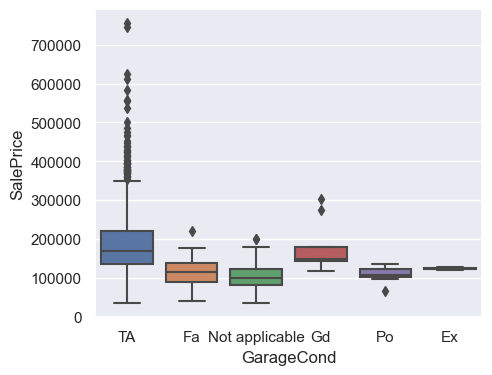

PavedDrive


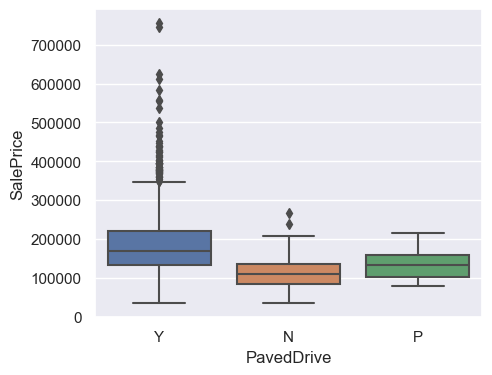

Fence


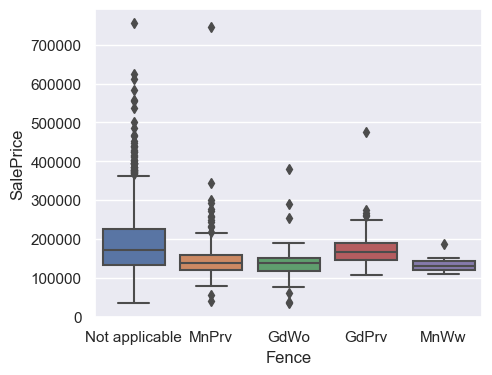

SaleType


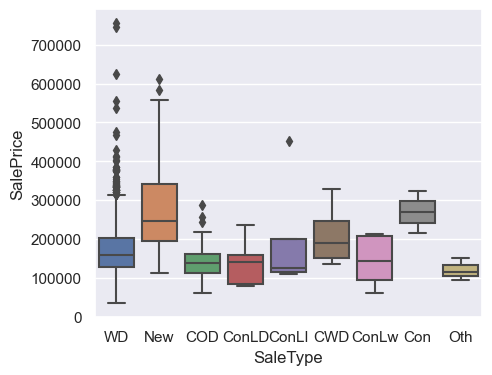

SaleCondition


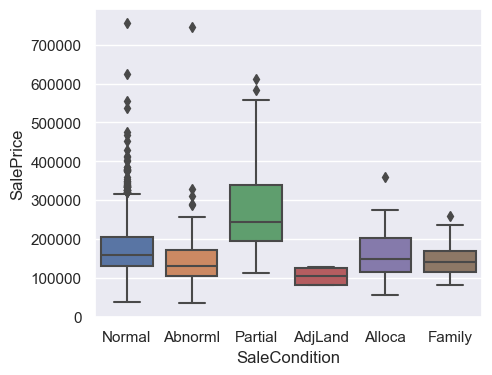

In [211]:
# Bivariate analysis - Box plots for all categorical predictor variables against the target variable saleprice

for col1 in categorical_cols:
        print(col1)
        plt.figure(figsize=(5, 4))
        sns.boxplot(x=col1,y='SalePrice', data = houseprice_df)
        plt.show()


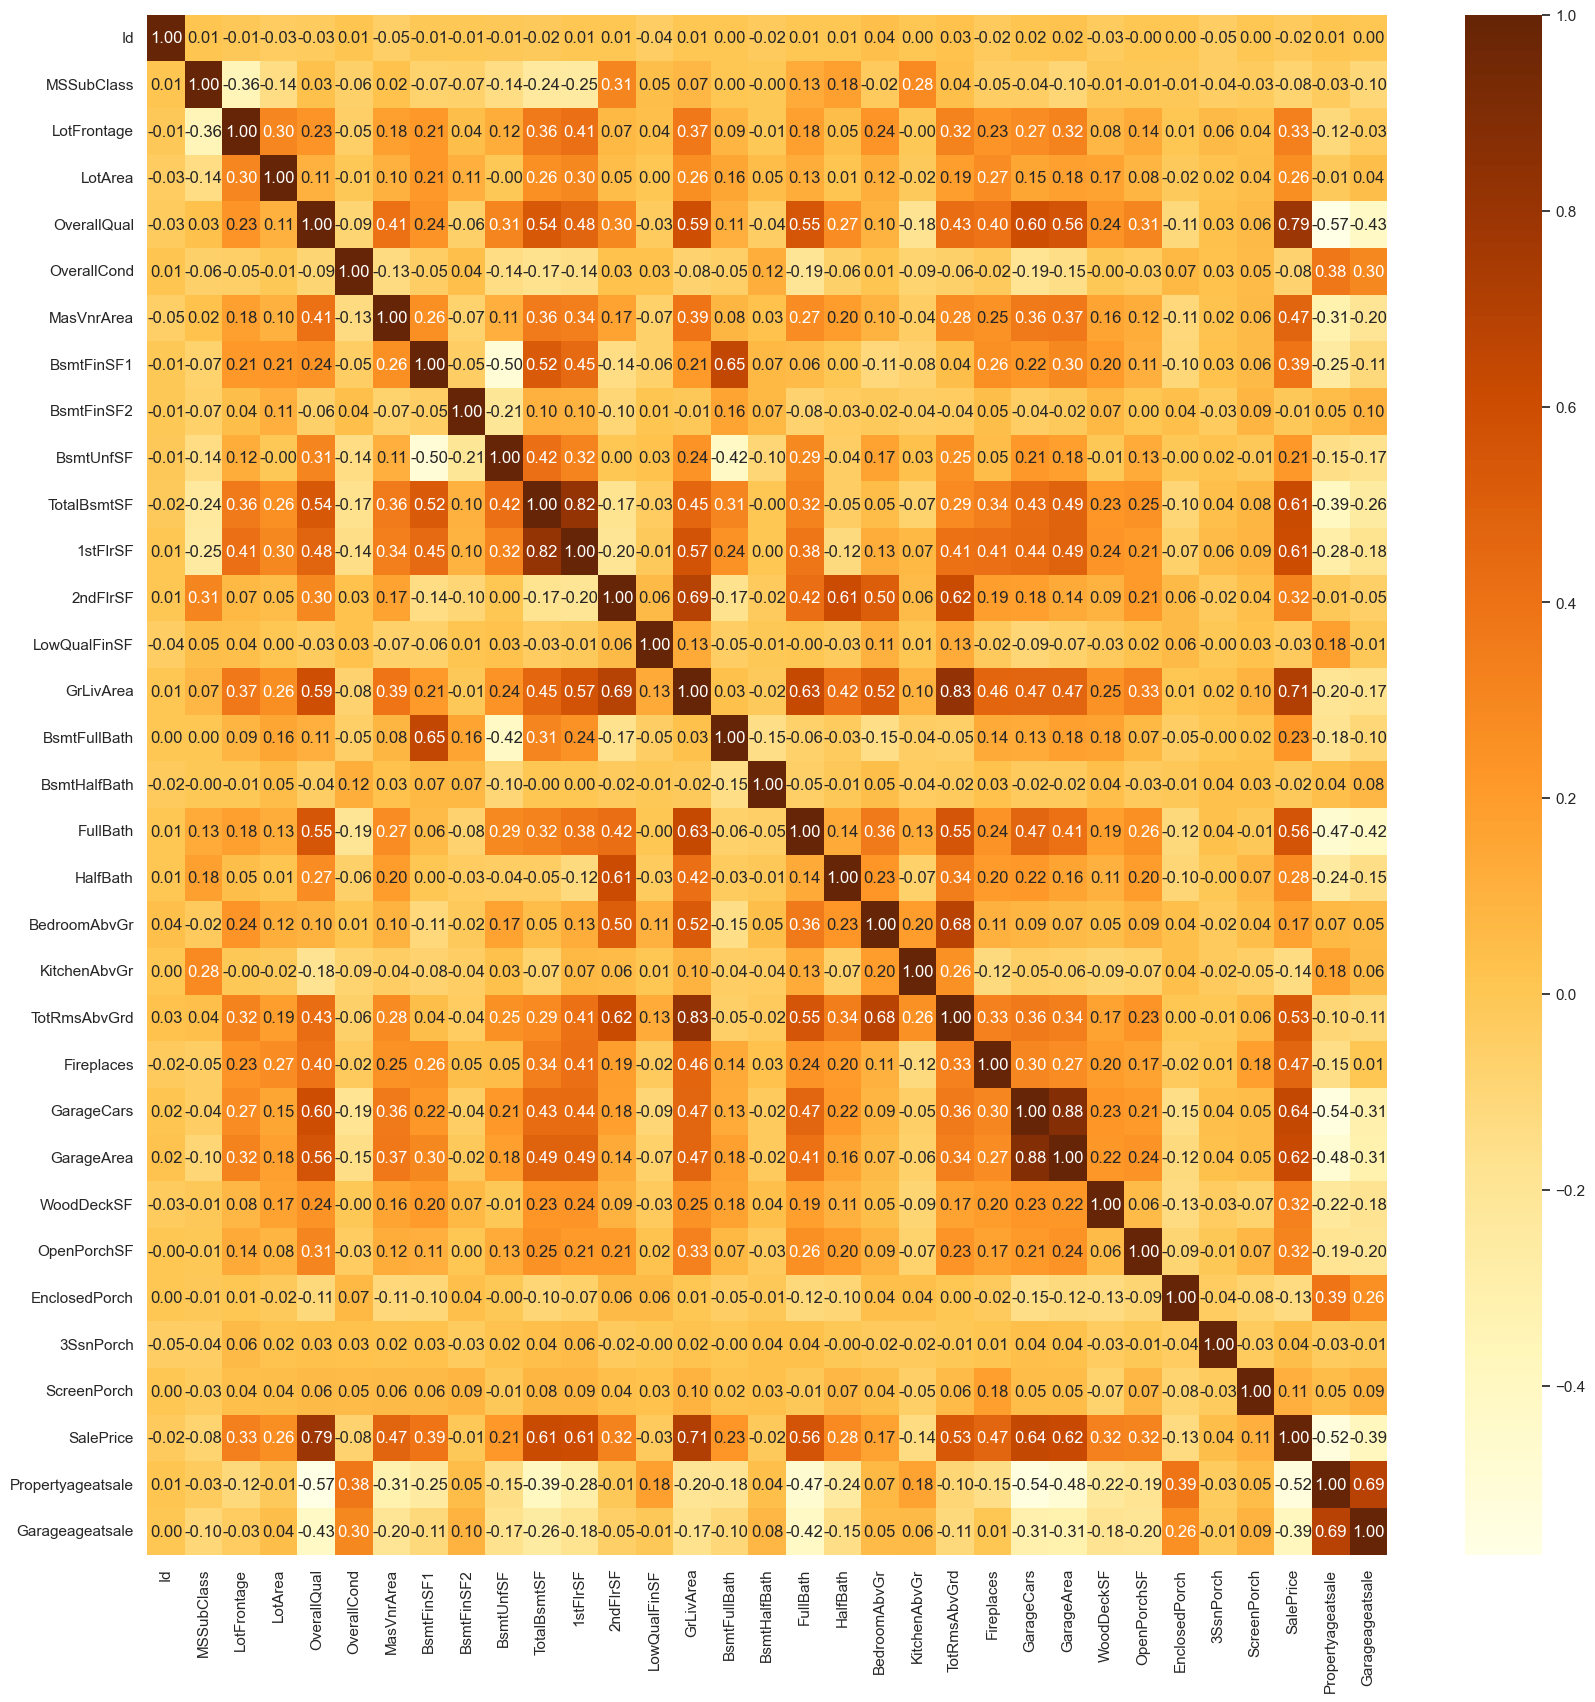

In [212]:
# Correlations
plt.figure(figsize=(20,20))
sns.heatmap(houseprice_df[numeric_cols].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

In [213]:
#Based on the correlations, the following variables have high correlation so will be good to check the relation deeper 
#using pairplot
high_correl_variables= ['SalePrice', 'GrLivArea', '1stFlrSF', '2ndFlrSF','GarageCars', 'BsmtFullBath','FullBath','BsmtUnfSF', 'BsmtFinSF1', 'OverallQual',  'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Propertyageatsale','Garageageatsale']


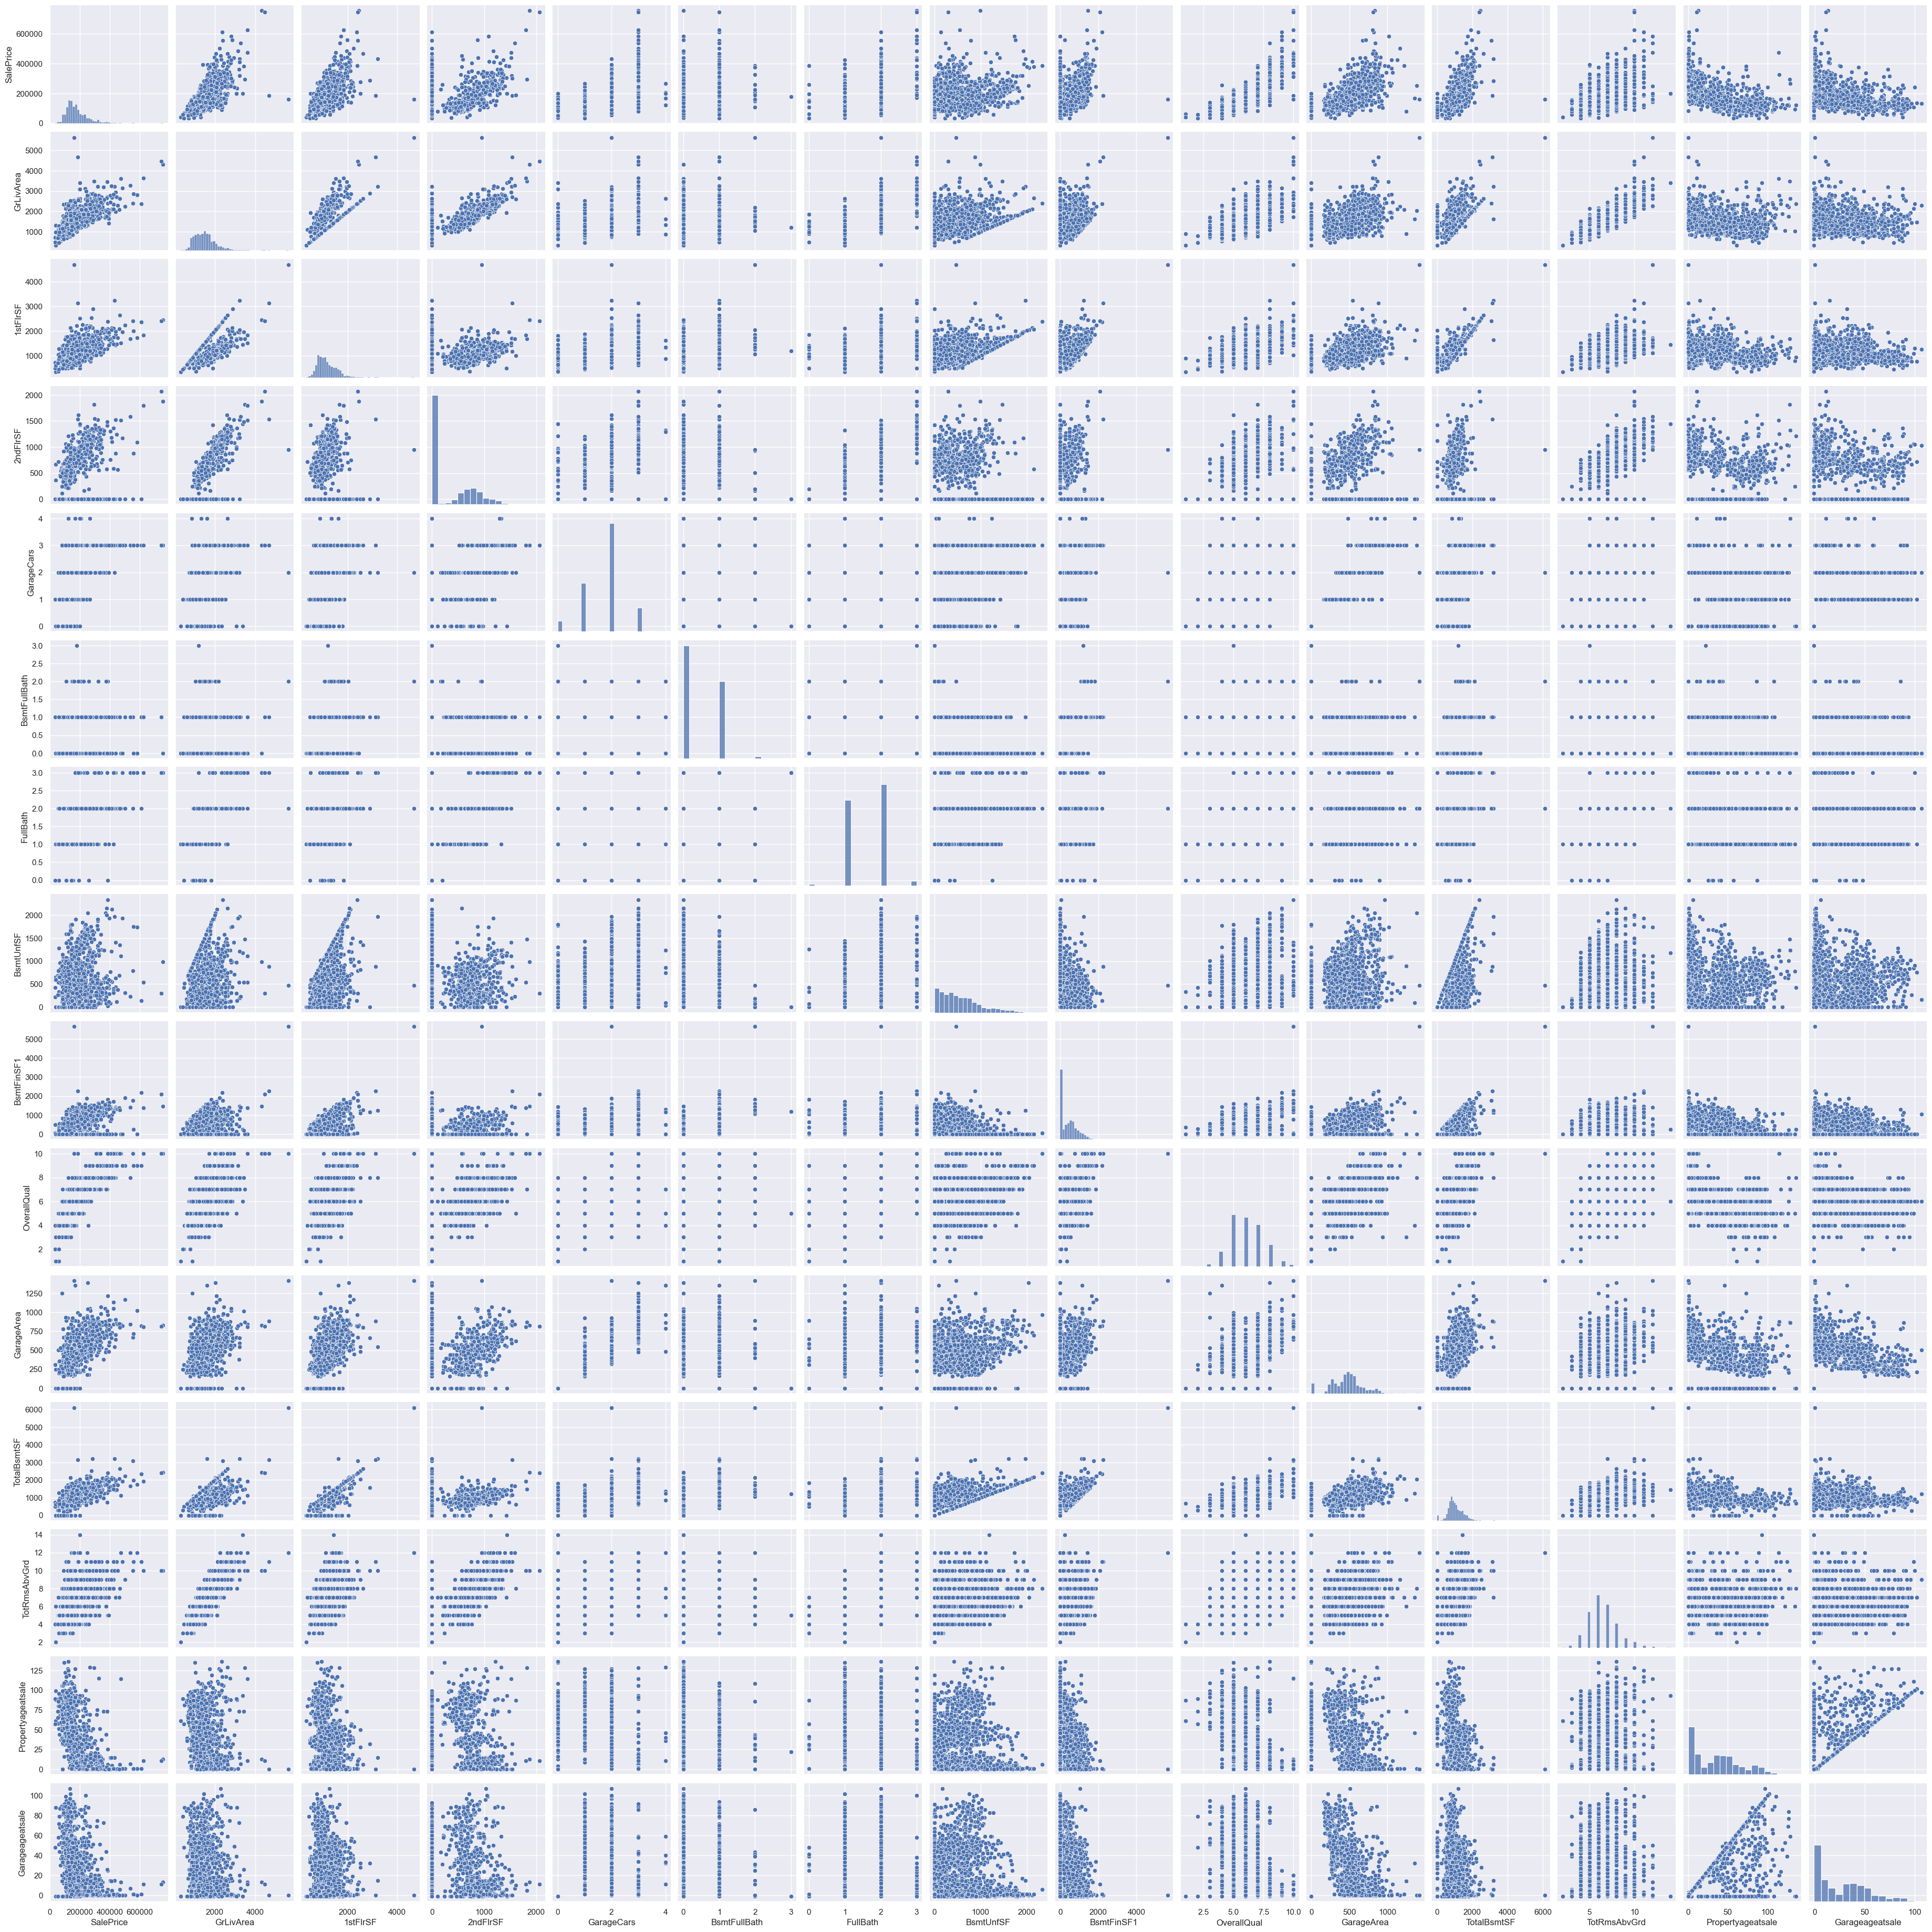

In [214]:
# Pairplots 
sns.set()
sns.pairplot(data=houseprice_df,vars=high_correl_variables, size=2.5)
plt.show()

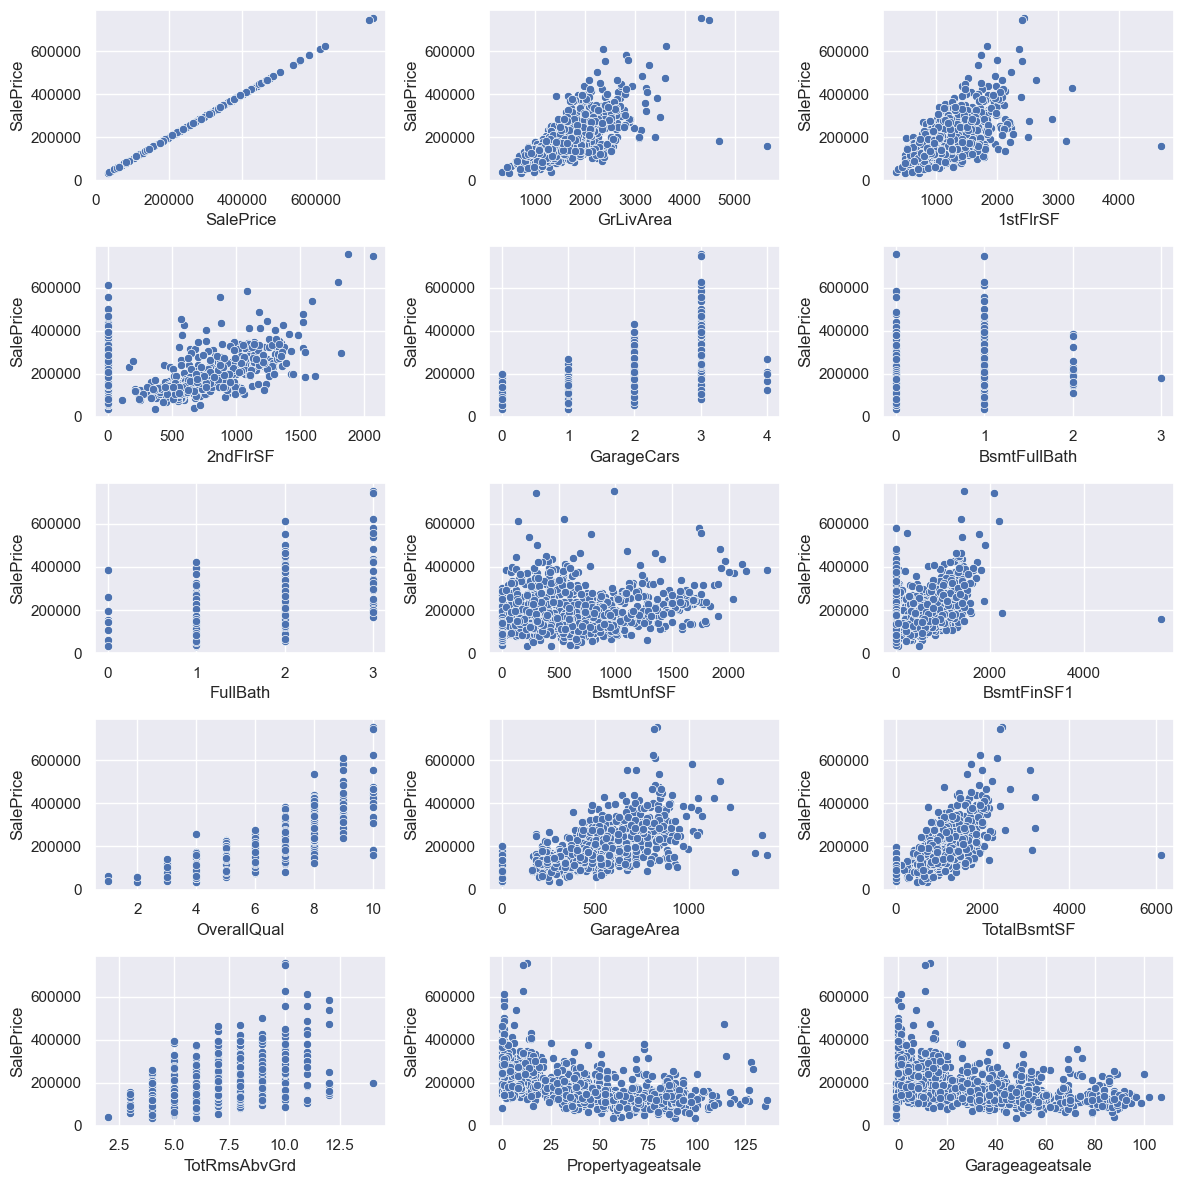

In [215]:
#Check the impact of these columns with SalePrice for predictive ability

fig=plt.subplots(figsize=(12, 12))

for i, col in enumerate(high_correl_variables):
    plt.subplot(5, 3, i+1)
    plt.subplots_adjust(hspace = 4.0)
    sns.scatterplot(x=houseprice_df[col],y=houseprice_df['SalePrice'])
    plt.tight_layout()

 #### Key Observations from EDA (Univariate, Bivariate / Correlations & Pairplots)
    
    - Houses with excellent quality basement or good living quarters (BsmtFinType1= GLQ) have high SalePrice
    - 'OverallCond' : SalePrice is highest for rating 5
    - 'FullBath' 2 and 'HalfBath' 1 have highest SalePrice
    - 'OverallQual' : High positive correlation
    - 'GrLivArea', 'GarageArea','LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' all have positive correlation with SalePrice.
    - PropertyAgeatSale is negatively correlated with SalePrice i.e older the property, lower price
    - Garageageatsale is highly correlated with PropertyAgeatSale, therefore can be dropped.
    - GarageCars is highly correlated with GarageArea so should be dropped
    - 'GarageCond' and 'GarageQual' provide the same meaning - drop one of the columns
    - 'TotRmsAbvGrd' is highly correlated with GrLivArea, so should be dropped.
    - From the countplots we can see that 'RoofMatl', 'Condition2', 'Heating', 'Fence', 'Functional','Street','Utilities' all have very low cardinality, 
      and only one of the values being heavily dominated
   

        
    
    
    

In [216]:
#Drop the columns identified above 

cols_to_drop= ['Garageageatsale','GarageCars','GarageCond','TotRmsAbvGrd','RoofMatl', 'Condition2', 'Heating', 'Fence', 'Functional','Street','Utilities' ]
houseprice_df = houseprice_df.drop(cols_to_drop, axis = 1)


 #### Check outliers

In [217]:
houseprice_df.dtypes.value_counts()

object     32
int64      28
float64     2
dtype: int64

In [218]:
# Selecting the Numerical and Categorical features for analysis
numeric_df = houseprice_df.select_dtypes(include=['int64', 'float64'])
categorical_df = houseprice_df.select_dtypes(include=['object'])
numeric_cols = list(numeric_df.columns)
categorical_cols = list(categorical_df.columns)

In [219]:
#Show the percentage of outliers in the numerical columns based on IQR
perc_out={}

for col in numeric_df.columns:
    q25 = numeric_df[col].quantile(.25)
    q75 = numeric_df[col].quantile(.75)
    IQR=q75-q25
    cnt_outl=numeric_df[(numeric_df[col]>(q75+1.5*IQR)) | (numeric_df[col]<(q25-1.5*IQR))].shape[0]
    perc_out[col]=round(cnt_outl/numeric_df.shape[0]*100,2)
    
outl_df=pd.DataFrame({'Columns':list(perc_out.keys()),'Perc':list(perc_out.values())})
outl_df.sort_values(by="Perc", ascending=False)

Columns    Perc
25      EnclosedPorch 14.2500
8          BsmtFinSF2 11.4400
5         OverallCond  8.5600
27        ScreenPorch  7.9500
2         LotFrontage  7.2600
1          MSSubClass  7.0500
6          MasVnrArea  6.7100
16       BsmtHalfBath  5.6200
24        OpenPorchSF  5.2700
3             LotArea  4.7300
20       KitchenAbvGr  4.6600
28          SalePrice  4.1800
10        TotalBsmtSF  4.1800
19       BedroomAbvGr  2.4000
23         WoodDeckSF  2.1900
14          GrLivArea  2.1200
9           BsmtUnfSF  1.9900
13       LowQualFinSF  1.7800
26          3SsnPorch  1.6400
22         GarageArea  1.4400
11           1stFlrSF  1.3700
29  Propertyageatsale  0.5500
7          BsmtFinSF1  0.4800
21         Fireplaces  0.3400
12           2ndFlrSF  0.1400
4         OverallQual  0.1400
15       BsmtFullBath  0.0700
18           HalfBath  0.0000
17           FullBath  0.0000
0                  Id  0.0000

 #### Key Observations
    - A lot of columns have outliers
    - Given the dataset is only 1460 rows, we do not want to remove the outliers
    - We will use standardscaler to reduce the impact of outliers
    
    
    

 #### Distribution of Target variable 'Saleprice'

<Axes: xlabel='SalePrice', ylabel='Density'>

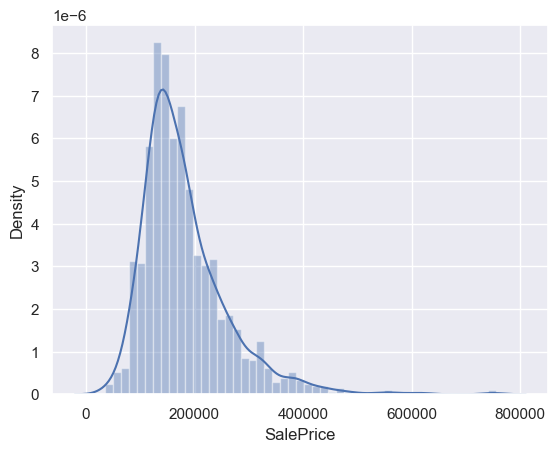

In [220]:
#Check distribution of target variable saleprice

sns.distplot(houseprice_df['SalePrice'])

In [221]:
#Check skewness and kurtosis
print("Skewness: {}".format(houseprice_df['SalePrice'].skew()))
print("Kurtosis: {}".format(houseprice_df['SalePrice'].kurt()))


Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


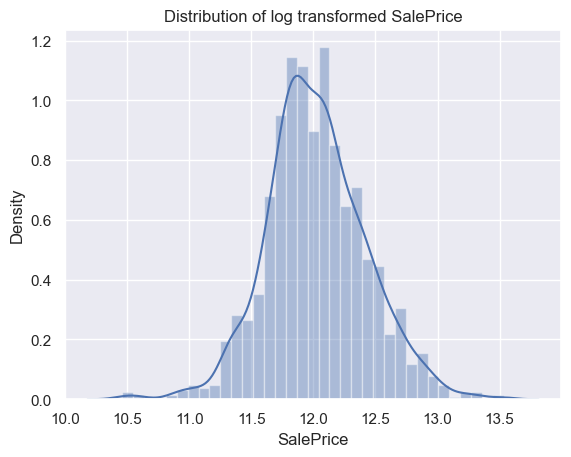

In [222]:
#Check whether log transformation works to produce normal distribution for Sale Price
sns.distplot(np.log1p(houseprice_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [223]:
houseprice_df.shape

(1460, 62)

 #### S4:Model Building

#### Data Preparation for model building

In [224]:
#Create dummy columns for converting categorical data
houseprice_df = pd.get_dummies(houseprice_df, drop_first=True )
houseprice_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  SalePrice  Propertyageatsale  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0   1          60      65.0000     8450            7            5    196.0000         706           0        150          856       856       854             0       1710             1             0         2         1             3             1           0         548           0           61              0          0            0     208500                  5            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
1   2          20      80.0000     9600            6            8      0.0000         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1           1         460         298            0              0          0            0     181500                 31            0            0            1            0             0             0             1                0                0                1                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
2   3          60      68.0000    11250            7            5    162.0000         486           0        434          920       920       866             0       1786             1             0         2         1             3             1           1         608           0           42              0          0            0     223500                  7            0            0            1            0             0             0             0                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
3   4  

In [225]:
houseprice_df.shape

(1460, 209)

In [226]:
#Drop ID column as this is a unique indicator for the dataset
houseprice_df = houseprice_df.drop(['Id'], axis=1)


In [227]:
#Drop the response variable (SalePrice) for train  set 

X_hp = houseprice_df.drop(['SalePrice'], axis=1)
y_hp = np.log(houseprice_df['SalePrice'])


In [228]:
#Train and Test splits
X_train, X_test, y_train, y_test = train_test_split(X_hp, y_hp, train_size=0.7, test_size=0.3, random_state=50)

In [229]:
# Selecting the Numerical and Categorical features for analysis
numeric_df_traintest = X_hp.select_dtypes(include=['int64', 'float64'])
categorical_df_traintest = X_hp.select_dtypes(include=['object'])
numeric_cols_traintest = list(numeric_df_traintest.columns)
categorical_cols_traintest = list(categorical_df_traintest.columns)

In [230]:
#Standard scaling applied to all numerical columns
sr = StandardScaler()

X_train[numeric_cols_traintest] = sr.fit_transform(X_train[numeric_cols_traintest])

X_test[numeric_cols_traintest] = sr.fit_transform(X_test[numeric_cols_traintest])



In [231]:
X_train.shape

(1021, 207)

In [232]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  Propertyageatsale  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
175      -0.8704       0.6376   0.1661      -0.0600       1.2527     -0.5750      0.0854     -0.2831     0.3615       0.3474    2.5722   -0.7976       -0.1214     1.2298        1.1053       -0.2323    0.7869   -0.7517        1.4077       -0.2130      0.6223      0.4780     -0.7408      -0.2616         0.2829    -0.1107      -0.2607             0.6601            0            0            1            0             0             0             1                0                0                1                  0              0              0                 0              0              0                     0                    0                     0                     0                     0                     0                     1                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
1408      0.3048      -0.4250  -0.2610      -1.5013       1.2527     -0.5750     -0.9434     -0.2831     0.1266      -0.9737   -1.0698    0.6309       -0.1214    -0.2791       -0.8075       -0.2323   -1.0065   -0.7517        0.1761       -0.2130     -0.9350      0.2566     -0.7408      -0.7219        -0.3580    -0.1107       3.0168             2.0667            0            0            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     1                   0   
1148     -0.1653      -0.0265  -0.4398       0.6607       1.2527     -0.5750     -0.9434     -0.2831     0.0126      -1.0876   -1.5042    0.4403       -0.1214    -0.7574       -0.8075       -0.2323   -1.0065   -0.7517       -1.0555       -0.2130      0.6223     -0.8503     -0.7408      -0.7219         2.5345    -0.1107      -0.2607             1.4779            0            0            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     1                   0   
861       3.1252       0.2391   0.0793      -0.7807      -

In [233]:
X_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  Propertyageatsale  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
930      -0.8797       0.1262  -0.2115       1.3585      -0.5096     -0.5601     -1.0095     -0.3019     1.9660       0.8992    0.7712   -0.7911       -0.1193    -0.1175       -0.8519       -0.2613    0.7987   -0.7863        0.1357       -0.2081     -0.9879      0.6571     -0.0198      -0.4272        -0.3628    -0.1290      -0.2938            -1.1503            0            0            1            0             0             0             0                1                0                0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
530       0.5598       0.7091   0.0300      -0.0999      -0.5096      0.5971      0.7438     -0.3019     0.2457       0.8877    0.8847   -0.7911       -0.1193    -0.0351        1.1119       -0.2613    0.7987   -0.7863        0.1357       -0.2081      0.5520      0.6087      0.9249      -0.6733        -0.3628    -0.1290      -0.2938            -0.5398            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
1291      2.4791      -2.3998  -1.5839      -0.8291       1.3503      0.8560     -0.5180     -0.3019    -0.3760      -1.0191   -1.4341    0.7404       -0.1193    -0.4317       -0.8519       -0.2613    0.7987    1.1818        0.1357       -0.2081     -0.9879     -1.0178      0.6278      -0.6733        -0.3628    -0.1290      -0.2938             0.0368            0            0            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    1                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
1385     -0.1599      -1.4768  -0.8724      -1.5582       

 #### Ridge and Lasso Regression Model building

In [234]:
# Shape of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 207)
y_train (1021,)


In [235]:
# Function to tune alpha, Build the model and evaluate

def tune_build_evaluate_models(X_train, y_train, X_test, params, model):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  
  alpha = model_cv.best_params_["alpha"]
  print("The optimal alpha value for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Results Summary
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

#### Ridge Regression

In [236]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = tune_build_evaluate_models(X_train, y_train, X_test, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
The optimal alpha value for ridge is 50.000000
ridge  Regression with  50
R2 score (train) :  0.9020496865615709
R2 score (test) :  0.8759022434812159
RMSE (train) :  0.12525145087376433
RMSE (test) :  0.13998244238107563


#### Lasso Regression

In [237]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = tune_build_evaluate_models(X_train, y_train, X_test, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The optimal alpha value for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9021510515706596
R2 score (test) :  0.8774506498742309
RMSE (train) :  0.12518662514533568
RMSE (test) :  0.13910639885121923


#### Comparison of Model Results

In [238]:
all_model_coeff = pd.DataFrame(index=X_test.columns)
all_model_coeff.rows = X_test.columns

all_model_coeff['Ridge (alpha=50.0)'] = ridge_final_model.coef_
all_model_coeff['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
all_model_coeff

Ridge (alpha=50.0)  Lasso (alpha=0.001)
MSSubClass                              -0.0206              -0.0205
LotFrontage                             -0.0084              -0.0076
LotArea                                  0.0177               0.0184
OverallQual                              0.0916               0.1026
OverallCond                              0.0562               0.0594
MasVnrArea                               0.0078               0.0011
BsmtFinSF1                              -0.0008              -0.0016
BsmtFinSF2                               0.0060               0.0053
BsmtUnfSF                                0.0022               0.0040
TotalBsmtSF                              0.0036               0.0000
1stFlrSF                                 0.0416               0.0101
2ndFlrSF                                 0.0334               0.0000
LowQualFinSF                            -0.0022              -0.0060
GrLivArea                                0.0581               0.1091
BsmtFullBath                             0.0287               0.0320
BsmtHalfBath                             0.0011               0.0016
FullBath                                 0.0363               0.0326
HalfBath                                 0.0209               0.0161
BedroomAbvGr                             0.0157               0.0110
KitchenAbvGr                            -0.0054              -0.0040
Fireplaces                               0.0082               0.0000
GarageArea                               0.0383               0.0411
WoodDeckSF                               0.0113               0.0110
OpenPorchSF                              0.0063               0.0055
EnclosedPorch                            0.0075               0.0066
3SsnPorch                                0.0044               0.0026
ScreenPorch                              0.0134               0.0130
Propertyageatsale                       -0.0469              -0.0600
MSZoning_FV                              0.0162               0.0000
MSZoning_RH                              0.0107               0.0000
MSZoning_RL                              0.0312               0.0128
MSZoning_RM                             -0.0292              -0.0468
LotShape_IR2                             0.0097               0.0000
LotShape_IR3                            -0.0206              -0.0105
LotShape_Reg                            -0.0049              -0.0000
LandContour_HLS                          0.0090               0.0000
LandContour_Low                          0.0047               0.0000
LandContour_Lvl                         -0.0002              -0.0000
LotConfig_CulDSac                        0.0203               0.0279
LotConfig_FR2                           -0.0109              -0.0000
LotConfig_FR3                           -0.0019              -0.0000
LotConfig_Inside                        -0.0097              -0.0051
LandSlope_Mod                            0.0110               0.0000
LandSlope_Sev                           -0.0077              -0.0000
Neighborhood_Blueste                    -0.0017              -0.0000
Neighborhood_BrDale                     -0.0110              -0.0000
Neighborhood_BrkSide                     0.0173               0.0179
Neighborhood_ClearCr                     0.0081               0.0000
Neighborhood_CollgCr                    -0.0158              -0.0066
Neighborhood_Crawfor                     0.0472               0.0974
Neighborhood_Edwards                    -0.0484              -0.0670
Neighborhood_Gilbert                    -0.0144              -0.0000
Neighborhood_IDOTRR                     -0.0267              -0.0343
Neighborhood_MeadowV                    -0.0215              -0.0000
Neighborhood_Mitchel                    -0.0072              -0.0000
Neighborhood_NAmes                      -0.0031               0.0000
Neighborhood_NPkVill                    -0.0013              -0.0000
Neighborhood_NWAmes        

 #### S5:Evaluation - Model choice and key observations

### Between the two models, the final model will be lasso model at alpha value =0.001. 

#### This is because 
    - it produced higher R2 score and lower RMSE score for both train and test datasets
    - it reduces the coefficients to 0 for the least significant features. 
    - Out of 207 variables used, lasso has identified 78 strong predictor variables with accuracy

In [239]:
# Features ordered by feature importance in Lasso Regression

all_model_coeff[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

Lasso (alpha=0.001)
GrLivArea                                 0.1091
OverallQual                               0.1026
Neighborhood_Crawfor                      0.0974
SaleType_New                              0.0702
Neighborhood_StoneBr                      0.0665
Neighborhood_NridgHt                      0.0596
OverallCond                               0.0594
Condition1_Norm                           0.0501
CentralAir_Y                              0.0474
SaleCondition_Normal                      0.0471
Exterior1st_BrkFace                       0.0461
BsmtExposure_Gd                           0.0453
ExterCond_TA                              0.0422
GarageArea                                0.0411
Foundation_PConc                          0.0373
FullBath                                  0.0326
BsmtFullBath                              0.0320
BsmtFinType2_Unf                          0.0299
LotConfig_CulDSac                         0.0279
Neighborhood_NoRidge                      0.0247
MasVnrType_Stone                          0.0220
LotArea                                   0.0184
Neighborhood_Somerst                      0.0181
Neighborhood_BrkSide                      0.0179
FireplaceQu_Gd                            0.0175
HalfBath                                  0.0161
Exterior1st_MetalSd                       0.0141
ScreenPorch                               0.0130
Exterior1st_VinylSd                       0.0128
MSZoning_RL                               0.0128
PavedDrive_Y                              0.0118
WoodDeckSF                                0.0110
BedroomAbvGr                              0.0110
1stFlrSF                                  0.0101
HouseStyle_1Story                         0.0082
RoofStyle_Hip                             0.0075
EnclosedPorch                             0.0066
OpenPorchSF                               0.0055
BsmtFinSF2                                0.0053
BsmtUnfSF                                 0.0040
GarageQual_TA                             0.0036
BsmtFinType1_GLQ                          0.0028
3SsnPorch                                 0.0026
BsmtHalfBath                              0.0016
MasVnrArea                                0.0011
ExterCond_Gd                             -0.0000
ExterQual_Gd                              0.0000
BsmtFinType1_BLQ                          0.0000
BsmtExposure_Mn                           0.0000
Exterior2nd_MetalSd                       0.0000
Exterior2nd_Other                        -0.0000
Exterior2nd_Plywood                      -0.0000
BsmtCond_TA                               0.0000
Exterior2nd_Stone                         0.0000
BsmtCond_Po                               0.0000
Exterior2nd_VinylSd                       0.0000
Exterior2nd_Wd Sdng                       0.0000
BsmtCond_Gd                               0.0000
BsmtQual_Not applicable                  -0.0000
BsmtQual_Gd                              -0.0000
BsmtQual_Fa                               0.0000
Exterior2nd_Wd Shng                      -0.0000
Foundation_Wood                           0.0000
Foundation_Stone                          0.0000
Foundation_Slab                          -0.0000
MasVnrType_BrkFace                       -0.0000
MasVnrType_None                           0.0000
MasVnrType_Not applicable                -0.0000
BsmtFinType1_Rec                          0.0000
Foundation_CBlock                         0.0000
ExterQual_Fa                             -0.0000
ExterCond_Po                             -0.0000
BsmtFinType1_LwQ                         -0.0000
KitchenQual_Fa                           -0.0000
BsmtFinType2_BLQ                         -0.0000
GarageType_Not applicable                -0.0000
GarageQual_Fa                            -0.0000
GarageQual_Gd                             0.0000
GarageQual_Not applicable                -0.0000
GarageQual_Po                             0.0000
PavedDrive_P                             -0.0000
SaleType_CW

In [240]:
# Converting the predictions to its actual scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:20])

[218710 175700 118722 104983 274114 176844 165072 159986 163066 182816
 130620 171730  66693 158128 204607 214808 152578 183343 320745 144016]


 #### S6: Analysis for subjective Questions 

In [241]:
#Double the values of alpha and rebuild the ridge and lasso models

# Ridge model

ridge_model = Ridge(alpha=100.0)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

print("Model Re-evaluation : Ridge Regression, alpha=100.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Re-evaluation : Ridge Regression, alpha=100.0
R2 score (train) :  0.8937
R2 score (test) :  0.874
RMSE (train) :  0.1305
RMSE (test) :  0.1411


In [242]:
# Lasso model

lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.889
R2 score (test) :  0.8731
RMSE (train) :  0.1333
RMSE (test) :  0.1415


In [243]:
all_model_coeff['Ridge (alpha=100.0)'] = ridge_model.coef_
all_model_coeff['Lasso (alpha=0.002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
all_model_coeff

Ridge (alpha=50.0)  Lasso (alpha=0.001)  Ridge (alpha=100.0)  Lasso (alpha=0.002)
MSSubClass                              -0.0206              -0.0205              -0.0193              -0.0211
LotFrontage                             -0.0084              -0.0076              -0.0062              -0.0059
LotArea                                  0.0177               0.0184               0.0166               0.0184
OverallQual                              0.0916               0.1026               0.0887               0.1131
OverallCond                              0.0562               0.0594               0.0538               0.0588
MasVnrArea                               0.0078               0.0011               0.0089               0.0001
BsmtFinSF1                              -0.0008              -0.0016               0.0050              -0.0000
BsmtFinSF2                               0.0060               0.0053               0.0058               0.0014
BsmtUnfSF                                0.0022               0.0040               0.0033               0.0000
TotalBsmtSF                              0.0036               0.0000               0.0107               0.0117
1stFlrSF                                 0.0416               0.0101               0.0387               0.0144
2ndFlrSF                                 0.0334               0.0000               0.0308               0.0000
LowQualFinSF                            -0.0022              -0.0060              -0.0018              -0.0043
GrLivArea                                0.0581               0.1091               0.0539               0.1048
BsmtFullBath                             0.0287               0.0320               0.0266               0.0318
BsmtHalfBath                             0.0011               0.0016               0.0005               0.0000
FullBath                                 0.0363               0.0326               0.0365               0.0298
HalfBath                                 0.0209               0.0161               0.0210               0.0133
BedroomAbvGr                             0.0157               0.0110               0.0150               0.0062
KitchenAbvGr                            -0.0054              -0.0040              -0.0069              -0.0063
Fireplaces                               0.0082               0.0000               0.0134               0.0000
GarageArea                               0.0383               0.0411               0.0402               0.0423
WoodDeckSF                               0.0113               0.0110               0.0121               0.0114
OpenPorchSF                              0.0063               0.0055               0.0069               0.0040
EnclosedPorch                            0.0075               0.0066               0.0055               0.0028
3SsnPorch                                0.0044               0.0026               0.0039               0.0007
ScreenPorch                              0.0134               0.0130               0.0137               0.0137
Propertyageatsale                       -0.0469              -0.0600              -0.0449              -0.0640
MSZoning_FV                              0.0162               0.0000               0.0107               0.0000
MSZoning_RH                              0.0107               0.0000               0.0052               0.0000
MSZoning_RL                              0.0312               0.0128               0.0265               0.0108
MSZoning_RM                             -0.0292              -0.0468              -0.0269              -0.0501
LotShape_IR2                             0.0097               0.0000               0.0069               0.0000
LotShape_IR3                            -0.0206              -0.0105              -0.0126              -0.0000
LotShape_Reg                            -0.0049              -0.0000              -0.0084              -0.0016
LandContour_HLS                  

In [244]:
# Create a new lasso model to check after dropping the five most important predictor variables

X_train_check = X_train.drop(['GrLivArea', 'OverallQual','Neighborhood_Crawfor','SaleType_New','Neighborhood_StoneBr'], axis=1)
X_test_check = X_test.drop(['GrLivArea', 'OverallQual','Neighborhood_Crawfor','SaleType_New','Neighborhood_StoneBr'], axis=1)

params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_model_check, y_test_predicted_check = tune_build_evaluate_models(X_train_check, y_train, X_test_check, params, model='lasso')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
The optimal alpha value for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.8895716043941054
R2 score (test) :  0.8534488694382513
RMSE (train) :  0.13299038138709815
RMSE (test) :  0.1521199549607072


In [245]:
#checking coefficients of the lasso model without the top five important predictors

lasso_check_coeff = pd.DataFrame(index=X_test_check.columns)
lasso_check_coeff.rows = X_test_check.columns

lasso_check_coeff['lasso_model_check (alpha=0.001)'] = lasso_model_check.coef_
pd.set_option('display.max_rows', None)

lasso_check_coeff[['lasso_model_check (alpha=0.001)']].sort_values(by='lasso_model_check (alpha=0.001)', ascending=False)


lasso_model_check (alpha=0.001)
1stFlrSF                                              0.1104
2ndFlrSF                                              0.1091
Neighborhood_NridgHt                                  0.0726
OverallCond                                           0.0720
CentralAir_Y                                          0.0676
Exterior1st_BrkFace                                   0.0552
BsmtExposure_Gd                                       0.0488
GarageArea                                            0.0463
SaleCondition_Partial                                 0.0459
Condition1_Norm                                       0.0449
BsmtFinType2_Unf                                      0.0447
Foundation_PConc                                      0.0436
ExterCond_TA                                          0.0433
FullBath                                              0.0400
SaleCondition_Normal                                  0.0394
MasVnrType_Stone                                      0.0354
FireplaceQu_Gd                                        0.0341
Neighborhood_Somerst                                  0.0326
RoofStyle_Hip                                         0.0294
BsmtFullBath                                          0.0290
BsmtFinType1_GLQ                                      0.0285
Exterior2nd_CmentBd                                   0.0273
LotConfig_CulDSac                                     0.0249
Neighborhood_NoRidge                                  0.0244
MSZoning_RL                                           0.0210
Condition1_RRAn                                       0.0202
HalfBath                                              0.0166
LandContour_HLS                                       0.0156
ScreenPorch                                           0.0146
LotArea                                               0.0144
EnclosedPorch                                         0.0130
BsmtFinSF2                                            0.0119
BsmtUnfSF                                             0.0107
Exterior2nd_Wd Sdng                                   0.0104
PavedDrive_Y                                          0.0099
BedroomAbvGr                                          0.0077
WoodDeckSF                                            0.0074
MasVnrArea                                            0.0071
OpenPorchSF                                           0.0066
Exterior2nd_VinylSd                                   0.0062
BsmtCond_TA                                           0.0060
GarageType_Attchd                                     0.0060
TotalBsmtSF                                           0.0039
Exterior1st_MetalSd                                   0.0034
3SsnPorch                                             0.0033
BsmtCond_Gd                                           0.0032
LowQualFinSF                                          0.0030
BsmtFinType1_BLQ                                      0.0014
MasVnrType_Not applicable                            -0.0000
BsmtQual_Gd                                          -0.0000
BsmtExposure_Mn                                       0.0000
Exterior2nd_HdBoard                                  -0.0000
Exterior2nd_ImStucc                                   0.0000
Exterior2nd_MetalSd                                   0.0000
BsmtCond_Po                                          -0.0000
BsmtQual_Not applicable                              -0.0000
Exterior2nd_Other                                     0.0000
BsmtQual_Fa                                          -0.0000
ExterQual_Fa                                         -0.0000
Exterior2nd_Stone                                     0.0000
Foundation_Wood                                       0.0000
Foundation_Stone                                      0.0000
ExterCond_Po                                         -0.0000
Exterior2nd_Wd Shng                                  -0.0000
MasVnrType_BrkFace                                   -0.0000
Ext

### End of assignment